# Imports y preview basico de datos

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.stats import pointbiserialr

from IPython.display import display
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)

In [69]:
dataset = pd.read_csv('/Users/mmarchetta/Desktop/Tesis-2024/data-visualization/final_dataset.csv')
dataset["Tendencia"] = dataset["Close"].diff()
dataset["Tendencia"] = dataset["Tendencia"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

columns_to_normalize = [
    'Open',
    'High',
    'Low',
    'Close',
    'Volume',
    'Quote asset volume',
    # 'Number of trades',
    'Open_BTCUSDT',
    'High_BTCUSDT',
    'Low_BTCUSDT',
    'Close_BTCUSDT',
    'Volume_BTCUSDT',
    'Quote_asset_volume_BTCUSDT',
    # 'Number_of_trades_BTCUSDT',
    'Open_ETHUSDT',
    'High_ETHUSDT',
    'Low_ETHUSDT',
    'Close_ETHUSDT',
    'Volume_ETHUSDT',
    'Quote_asset_volume_ETHUSDT',
    # 'Number_of_trades_ETHUSDT',
    'Open_BNBUSDT',
    'High_BNBUSDT',
    'Low_BNBUSDT',
    'Close_BNBUSDT',
    'Volume_BNBUSDT',
    'Quote_asset_volume_BNBUSDT',
    # 'Number_of_trades_BNBUSDT'
]

scaler = MinMaxScaler()
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])
dataset.drop(['Cantidad_post','Cantidad_post_coin','Cantidad_post_referentes'], axis=1, inplace=True)
dataset.fillna(0, inplace=True)

dataset.to_csv('final_dataset_normalized.csv', index=False, float_format='%.8f')

display(dataset.head())

Open_time      Open      High       Low     Close    Volume  \
0  2021-09-27  0.502003  0.517208  0.492572  0.479580  0.290506   
1  2021-09-28  0.479684  0.480653  0.464587  0.451675  0.253904   
2  2021-09-29  0.451585  0.484737  0.463970  0.471009  0.265724   
3  2021-09-30  0.470915  0.492514  0.484958  0.497718  0.209695   
4  2021-10-01  0.497419  0.557457  0.513149  0.563891  0.348664   

   Quote asset volume  Number of trades  Open_BTCUSDT  High_BTCUSDT  \
0            0.223416          449178.0      0.529131      0.532125   
1            0.186206          362304.0      0.509543      0.502465   
2            0.195353          376232.0      0.487853      0.498719   
3            0.160164          339737.0      0.497502      0.528165   
4            0.281482          735059.0      0.541868      0.610800   

   Low_BTCUSDT  Close_BTCUSDT  Volume_BTCUSDT  Quote_asset_volume_BTCUSDT  \
0     0.524609       0.509543        0.040979                    0.085860   
1     0.500765       0.487882        0.045762                    0.090937   
2     0.498122       0.497502        0.032645                    0.066732   
3     0.511054       0.541947        0.049765                    0.101927   
4     0.547961       0.625386        0.076188                    0.164119   

   Number_of_trades_BTCUSDT  Open_ETHUSDT  High_ETHUSDT  Low_ETHUSDT  \
0                 1001487.0      0.541389      0.550539     0.532613   
1                 1045389.0      0.506087      0.499309     0.497723   
2                  884909.0      0.474717      0.493814     0.495897   
3                 1197815.0      0.486598      0.519788     0.510298   
4                 1771237.0      0.525983      0.594101     0.544710   

   Close_ETHUSDT  Volume_ETHUSDT  Quote_asset_volume_ETHUSDT  \
0       0.506304        0.126579                    0.325162   
1       0.474653        0.126913                    0.306094   
2       0.486597        0.098880                    0.240262   
3       0.525979        0.125672                    0.314145   
4       0.607100        0.165421                    0.435659   

   Number_of_trades_ETHUSDT  Open_BNBUSDT  High_BNBUSDT  Low_BNBUSDT  \
0                 1043885.0      0.321945      0.325617     0.336067   
1                  928494.0      0.303329      0.297490     0.324983   
2                  748804.0      0.297635      0.364128     0.327644   
3                  992243.0      0.373850      0.393120     0.405675   
4                 1446386.0      0.417214      0.467979     0.439149   

   Close_BNBUSDT  Volume_BNBUSDT  Quote_asset_volume_BNBUSDT  \
0       0.303395        0.197596                    0.205044   
1       0.297919        0.189790                    0.190886   
2       0.373932        0.365156                    0.389164   
3       0.417306        0.244504                    0.275529   
4       0.491785        0.307160                    0.370608   

   Number_of_trades_BNBUSDT   SMA_20     EMA_20  Upper_Band  Middle_Band  \
0                  457187.0  31.8460  30.832966   38.300296      31.8460   
1                  417006.0  31.7735  30.402208   38.438880      31.7735   
2                  653011.0  31.6465  30.104854   38.548518      31.6465   
3                  551245.0  31.6180  29.963440   38.564918      31.6180   
4                  727854.0  31.6365  30.151684   38.584778      31.6365   

   Lower_Band        RSI      MACD    Signal        ADX      SlowK      SlowD  \
0   25.391704  44.105068  0.015334  0.961983  21.202758  24.792766  33.777108   
1   25.108120  41.826161 -0.331059  0.703375  21.983800  16.099494  24.473925   
2   24.744482  43.985721 -0.521298  0.458440  22.608231  12.882557  17.924939   
3   24.671082  46.917342 -0.557510  0.255250  22.987843  16.422097  15.134716   
4   24.688222  53.421782 -0.314685  0.141263  21.863319  34.904850  21.403168   

          CCI       ATR        MFI  buy_1000x_high_coinbase  \
0  -86.299204  4.001346  29.230773                      0.0   
1 -10

In [70]:
display(dataset.describe())

Open        High         Low       Close      Volume  \
count  871.000000  871.000000  871.000000  871.000000  871.000000   
mean     0.157876    0.161791    0.154911    0.157412    0.157241   
std      0.211890    0.215285    0.207691    0.211629    0.122913   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.033469    0.034746    0.034271    0.033476    0.070567   
50%      0.060222    0.062668    0.059900    0.060254    0.128315   
75%      0.229489    0.239452    0.221573    0.223057    0.210856   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       Quote asset volume  Number of trades  Open_BTCUSDT  High_BTCUSDT  \
count          871.000000      8.710000e+02    871.000000    871.000000   
mean             0.064149      1.696309e+05      0.318332      0.315499   
std              0.103533      2.361782e+05      0.229027      0.230739   
min              0.000000      1.128700e+04      0.000000      0.000000   
25%              0.010630      4.747400e+04      0.136070      0.133247   
50%              0.025209      9.107500e+04      0.257664      0.250247   
75%              0.064635      1.848445e+05      0.497201      0.494401   
max              1.000000      2.616111e+06      1.000000      1.000000   

       Low_BTCUSDT  Close_BTCUSDT  Volume_BTCUSDT  Quote_asset_volume_BTCUSDT  \
count   871.000000     871.000000      871.000000                  871.000000   
mean      0.316655       0.318524        0.135054                    0.148237   
std       0.226823       0.229274        0.160569                    0.140817   
min       0.000000       0.000000        0.000000                    0.000000   
25%       0.135866       0.136072        0.032942                    0.054357   
50%       0.259693       0.257664        0.058837                    0.100519   
75%       0.493552       0.497201        0.201266                    0.193228   
max       1.000000       1.000000        1.000000                    1.000000   

       Number_of_trades_BTCUSDT  Open_ETHUSDT  High_ETHUSDT  Low_ETHUSDT  \
count              8.710000e+02    871.000000    871.000000   871.000000   
mean               2.695124e+06      0.304186      0.298434     0.316826   
std                2.683236e+06      0.228318      0.236330     0.218895   
min                3.108520e+05      0.000000      0.000000     0.000000   
25%                9.504365e+05      0.156927      0.147883     0.175653   
50%                1.382785e+06      0.224732      0.211920     0.245926   
75%                4.102689e+06      0.412454      0.412265     0.419311   
max                1.522359e+07      1.000000      1.000000     1.000000   

       Close_ETHUSDT  Volume_ETHUSDT  Quote_asset_volume_ETHUSDT  \
count     871.000000      871.000000                  871.000000   
mean        0.304099        0.129702                    0.212515   
std         0.228243        0.106050                    0.149348   
min         0.000000        0.000000                    0.000000   
25%         0.156927        0.064323                    0.098670   
50%         0.224730        0.101841                    0.183852   
75%         0.412540        0.157285                    0.293473   
max         1.000000        1.000000                    1.000000   

       Number_of_trades_ETHUSDT  Open_BNBUSDT  High_BNBUSDT  Low_BNBUSDT  \
count              8.710000e+02    871.000000    871.000000   871.000000   
mean               7.936693e+05      0.274102      0.265127     0.288977   
std                4.182309e+05      0.214968      0.219438     0.207908   
min                1.541100e+05      0.000000      0.000000     0.000000   
25%                5.051665e+05      0.107972      0.096603     0.130126   
50%                7.260130e+05      0.228208      0.217655     0.244735   
75%                9.927835e+05      0.358410      0.363371     0.363556   
max                3.172468e+06      1.000000      1.000000     1.000000   

  

In [71]:
display(dataset.tail())

Open_time      Open      High       Low     Close    Volume  \
866  2024-02-10  0.070704  0.070581  0.071958  0.070778  0.074522   
867  2024-02-11  0.070764  0.071592  0.072328  0.068765  0.096238   
868  2024-02-12  0.068751  0.072273  0.070291  0.073568  0.166037   
869  2024-02-13  0.073554  0.073692  0.073028  0.073828  0.142777   
870  2024-02-14  0.073833  0.078748  0.076361  0.079727  0.176075   

     Quote asset volume  Number of trades  Open_BTCUSDT  High_BTCUSDT  \
866            0.014598           58901.0      0.605890      0.604631   
867            0.018634           74020.0      0.617839      0.612654   
868            0.031240          119442.0      0.628447      0.645721   
869            0.027469          106417.0      0.659702      0.646363   
870            0.034995          130998.0      0.655496      0.678157   

     Low_BTCUSDT  Close_BTCUSDT  Volume_BTCUSDT  Quote_asset_volume_BTCUSDT  \
866     0.617265       0.617839        0.021059                    0.053746   
867     0.632186       0.628447        0.027919                    0.069270   
868     0.635198       0.659702        0.066564                    0.153786   
869     0.646843       0.655495        0.061964                    0.144887   
870     0.665052       0.695994        0.063952                    0.155029   

     Number_of_trades_BTCUSDT  Open_ETHUSDT  High_ETHUSDT  Low_ETHUSDT  \
866                 1323421.0      0.391160      0.379394     0.414894   
867                 1407270.0      0.394748      0.385512     0.420603   
868                 1939394.0      0.396579      0.418752     0.415006   
869                 1741811.0      0.436646      0.424172     0.445797   
870                 1859392.0      0.431401      0.450532     0.453207   

     Close_ETHUSDT  Volume_ETHUSDT  Quote_asset_volume_ETHUSDT  \
866       0.394747        0.035478                    0.081118   
867       0.396575        0.045253                    0.101371   
868       0.436645        0.109585                    0.233931   
869       0.431399        0.124425                    0.272914   
870       0.466758        0.112996                    0.257525   

     Number_of_trades_ETHUSDT  Open_BNBUSDT  High_BNBUSDT  Low_BNBUSDT  \
866                  622723.0      0.278143      0.255950     0.300377   
867                  711081.0      0.275953      0.254868     0.303037   
868                 1019390.0      0.270696      0.270662     0.293061   
869                 1044885.0      0.286684      0.264171     0.299712   
870                 1090412.0      0.279457      0.275855     0.310352   

     Close_BNBUSDT  Volume_BNBUSDT  Quote_asset_volume_BNBUSDT  \
866       0.276013        0.053771                    0.054711   
867       0.270975        0.044448                    0.046010   
868       0.286528        0.111580                    0.109168   
869       0.279737        0.080964                    0.080807   
870       0.299890        0.083437                    0.085026   

     Number_of_trades_BNBUSDT   SMA_20    EMA_20  Upper_Band  Middle_Band  \
866                  149800.0  6.77300  6.945877    7.257898      6.77300   
867                  137326.0  6.81090  6.960460    7.272756      6.81090   
868                  222424.0  6.85985  6.996607    7.328074      6.85985   
869                  203711.0  6.90440  7.030549    7.382184      6.90440   
870                  200782.0  6.96495  7.089449    7.495037      6.96495   

     Lower_Band        RSI      MACD    Signal        ADX      SlowK  \
866    6.288102  55.583961 -0.025449 -0.104148  17.730553  78.930930   
867    6.349044  52.913150 -0.011426 -0.085604  17.682153  79.094301   
868    6.391626  58.088155  0.018916 -0.064700  17.214181  83.186784   
869    6.426616  58.354041  0.043510 -0.043058  17.024827  85.054018   
870    6.434863  63.960292  0.085895 -0.017267  17.636466  93.306224   

         SlowD         CCI       ATR        MFI  buy_1000x_high_coinbase  \
866  70.779115  158.2

In [72]:
print(dataset.columns)

Index(['Open_time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Quote asset volume', 'Number of trades', 'Open_BTCUSDT',
       'High_BTCUSDT', 'Low_BTCUSDT', 'Close_BTCUSDT', 'Volume_BTCUSDT',
       'Quote_asset_volume_BTCUSDT', 'Number_of_trades_BTCUSDT',
       'Open_ETHUSDT', 'High_ETHUSDT', 'Low_ETHUSDT', 'Close_ETHUSDT',
       'Volume_ETHUSDT', 'Quote_asset_volume_ETHUSDT',
       'Number_of_trades_ETHUSDT', 'Open_BNBUSDT', 'High_BNBUSDT',
       'Low_BNBUSDT', 'Close_BNBUSDT', 'Volume_BNBUSDT',
       'Quote_asset_volume_BNBUSDT', 'Number_of_trades_BNBUSDT', 'SMA_20',
       'EMA_20', 'Upper_Band', 'Middle_Band', 'Lower_Band', 'RSI', 'MACD',
       'Signal', 'ADX', 'SlowK', 'SlowD', 'CCI', 'ATR', 'MFI',
       'buy_1000x_high_coinbase', 'sell_1000x_high_coinbase',
       'total_trades_coinbase', 'Sentimiento', 'Tweets_Utilizados',
       'Cantidad_pos', 'Cantidad_neg', 'Cantidad_neu', 'Compound total',
       'Sentimiento_coin', 'Tweets_Utilizados_coin', 'Cantidad_pos_co

In [73]:
display(dataset.dtypes)

Open_time                         object
Open                             float64
High                             float64
Low                              float64
Close                            float64
                                  ...   
Tweets_Utilizados_whale_alert    float64
Buy_1000x_high                   float64
sell_1000x_high                  float64
total_trades_binance             float64
Tendencia                          int64
Length: 69, dtype: object

# Graficos

### Graficos de series temporales:

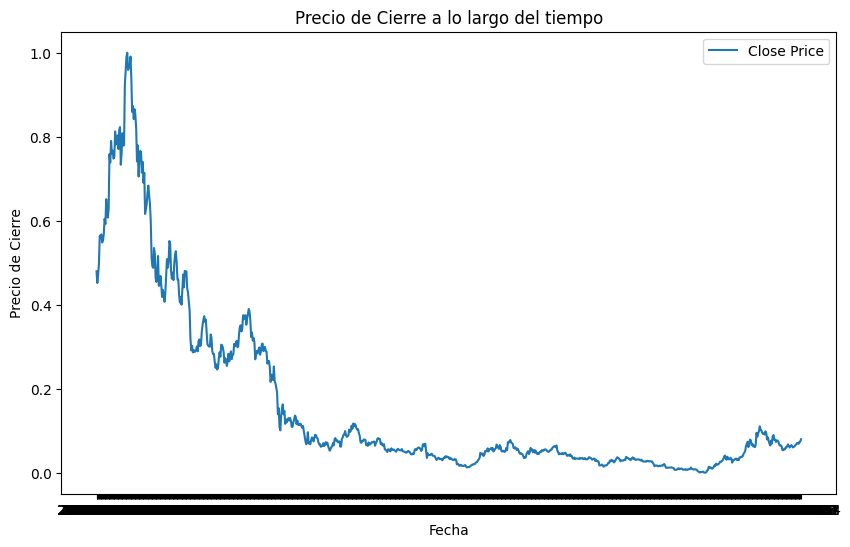

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(dataset['Open_time'], dataset['Close'], label='Close Price')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Precio de Cierre a lo largo del tiempo')
plt.legend()
plt.show()

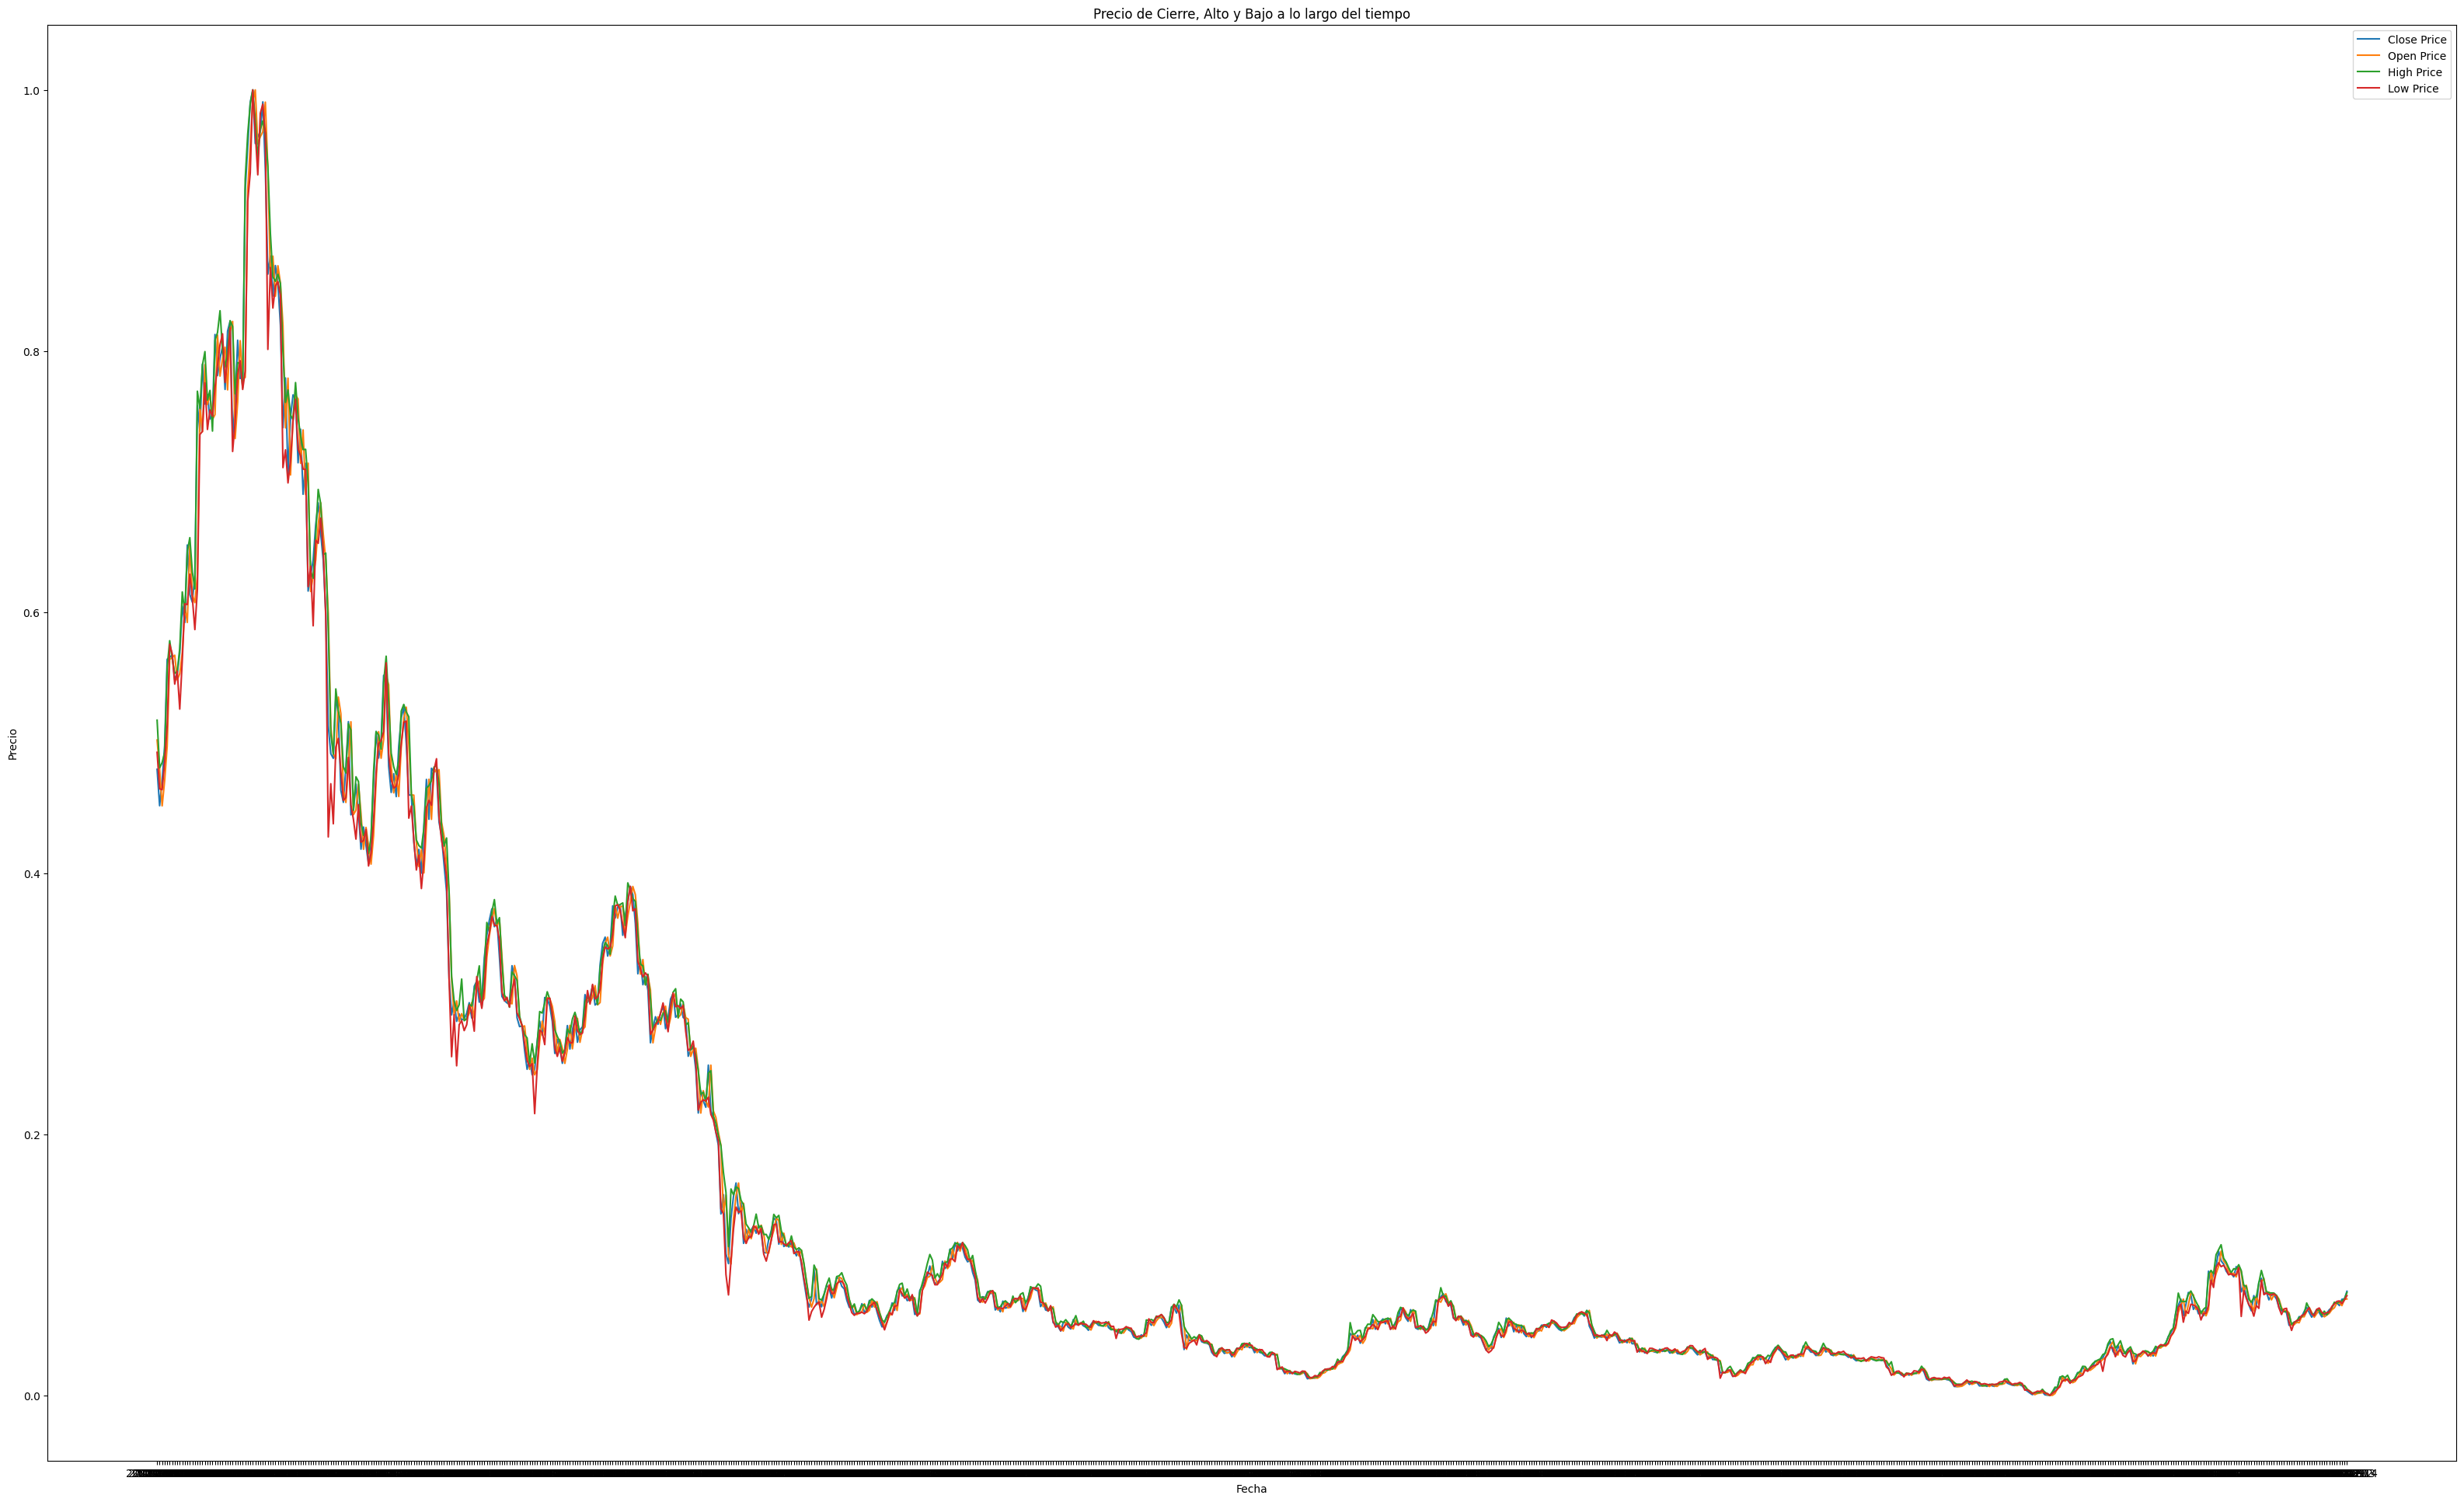

In [75]:
plt.figure(figsize=(40, 24))
plt.plot(dataset['Open_time'], dataset['Close'], label='Close Price')
plt.plot(dataset['Open_time'], dataset['Open'], label='Open Price')
plt.plot(dataset['Open_time'], dataset['High'], label='High Price')
plt.plot(dataset['Open_time'], dataset['Low'], label='Low Price')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precio de Cierre, Alto y Bajo a lo largo del tiempo')
plt.legend()
plt.show()

In [76]:
# Este codigo se ejecutaba antes de agregar el codigo para normalizar los values.

# scaler = MinMaxScaler()
# dataset[['Tweets_Utilizados', 'Tweets_Utilizados_coin', 'Tweets_Utilizados_referentes']] = scaler.fit_transform(dataset[['Tweets_Utilizados', 'Tweets_Utilizados_coin', 'Tweets_Utilizados_referentes']])

# # Crear el gráfico de serie con subgráficos
# fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# # Subgráfico para el precio de cierre
# axs[0].plot(dataset['Open_time'], dataset['Close'], label='Precio de Cierre', color='blue')
# axs[0].set_ylabel('Precio de Cierre')
# axs[0].set_title('Precio de Cierre a lo largo del tiempo')
# axs[0].grid(True)

# # Subgráfico para las variables de tweets
# axs[1].plot(dataset['Open_time'], dataset['Tweets_Utilizados'], label='Tweets Utilizados', color='green', linestyle='--')
# axs[1].plot(dataset['Open_time'], dataset['Tweets_Utilizados_coin'], label='Tweets Utilizados Coin', color='red', linestyle='-.')
# axs[1].plot(dataset['Open_time'], dataset['Tweets_Utilizados_referentes'], label='Tweets Utilizados Referentes', color='orange', linestyle=':')

# axs[1].set_xlabel('Fecha')
# axs[1].set_ylabel('Valor Normalizado')
# axs[1].set_title('Cantidad de Tweets Normalizados a lo largo del tiempo')
# axs[1].legend()
# axs[1].grid(True)

# plt.tight_layout()
# plt.show()

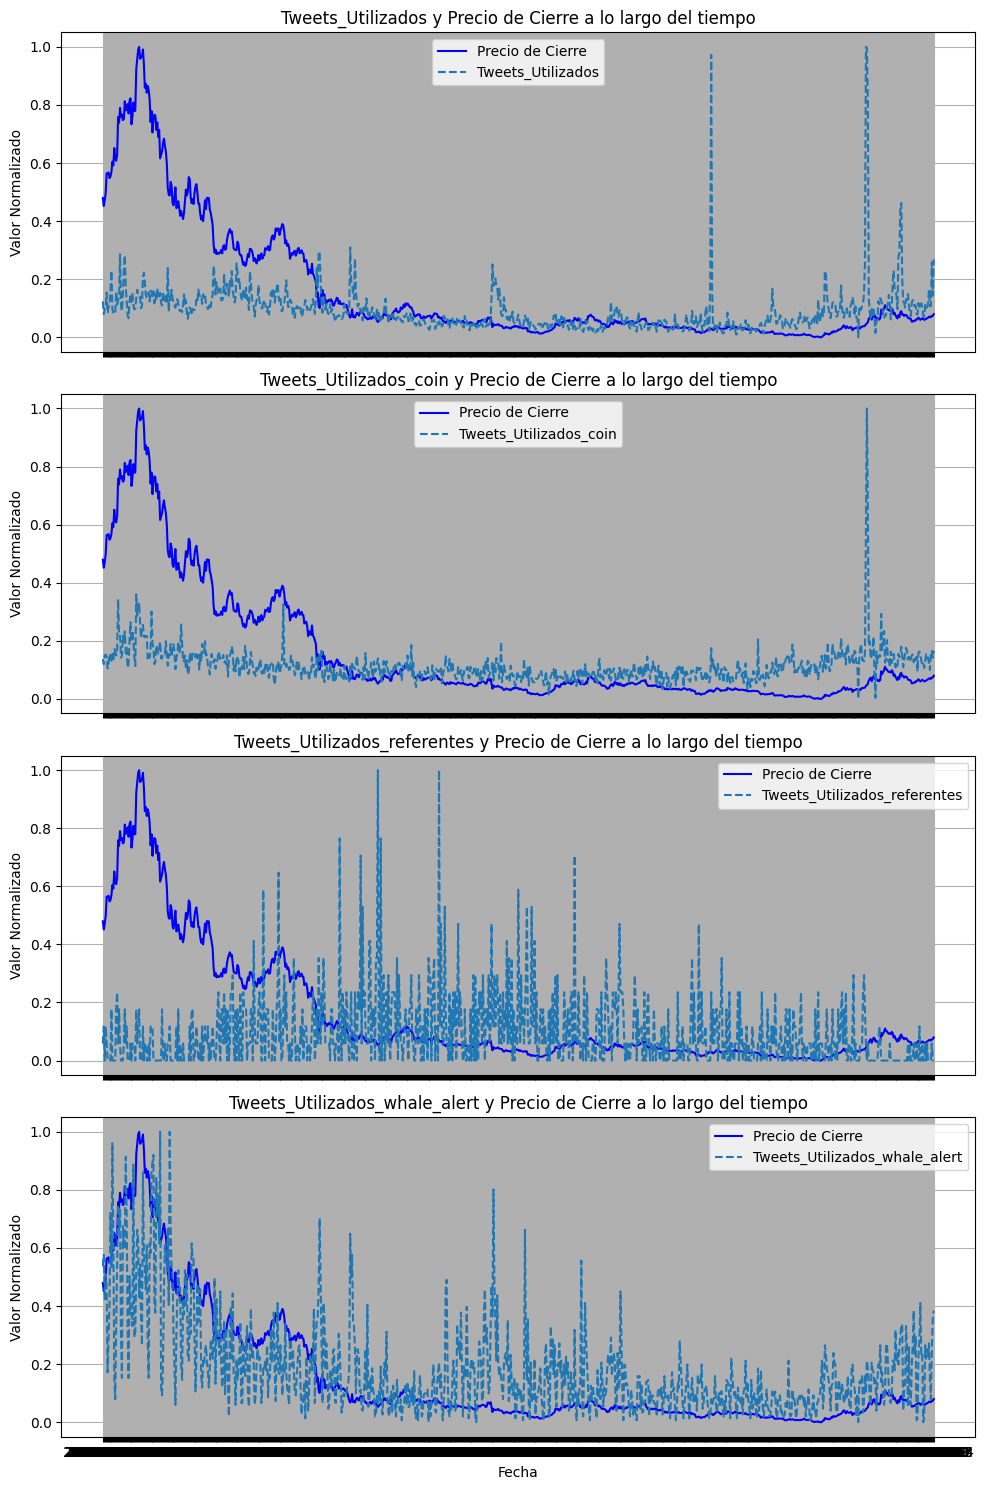

In [77]:
fig, axs = plt.subplots(4, 1, figsize=(10, 15), sharex=True)

# Escalar las variables de tweets
scaler = MinMaxScaler()
dataset[['Tweets_Utilizados', 'Tweets_Utilizados_coin', 'Tweets_Utilizados_referentes', 'Tweets_Utilizados_whale_alert']] = scaler.fit_transform(dataset[['Tweets_Utilizados', 'Tweets_Utilizados_coin', 'Tweets_Utilizados_referentes', 'Tweets_Utilizados_whale_alert']])

# Subgráficos para las variables de tweets
for i, var in enumerate(['Tweets_Utilizados', 'Tweets_Utilizados_coin', 'Tweets_Utilizados_referentes', 'Tweets_Utilizados_whale_alert']):
    axs[i].plot(dataset['Open_time'], dataset['Close'], label='Precio de Cierre', color='blue')
    axs[i].plot(dataset['Open_time'], dataset[var], label=var, linestyle='--')
    axs[i].set_ylabel('Valor Normalizado')
    axs[i].set_title(f'{var} y Precio de Cierre a lo largo del tiempo')
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel('Fecha')

plt.tight_layout()
plt.show()

En los graficos anteriores, pareceria no haber una relacion (al menos visble) entre la cantidad de tweets y la variacion de el precio de cierre.

In [78]:
# Este codigo se ejecutaba antes de agregar el codigo para normalizar los values.

# scaler = MinMaxScaler()
# dataset[['buy_1000x_high_coinbase', 'sell_1000x_high_coinbase', 'Buy_1000x_high', 'sell_1000x_high', 'Tweets_Utilizados_whale_alert']] = scaler.fit_transform(dataset[['buy_1000x_high_coinbase', 'sell_1000x_high_coinbase', 'Buy_1000x_high', 'sell_1000x_high', 'Tweets_Utilizados_whale_alert']])

# # Crear el gráfico de serie para Close
# plt.figure(figsize=(10, 5))
# plt.plot(dataset['Open_time'], dataset['Close'], label='Precio de Cierre', color='blue')
# plt.xlabel('Fecha')
# plt.ylabel('Precio de Cierre Normalizado')
# plt.title('Precio de Cierre a lo largo del tiempo')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Crear el gráfico de serie para Buy 1000x High Coinbase, Buy 1000x High y Tweets Utilizados Whale Alert
# plt.figure(figsize=(10, 5))
# plt.plot(dataset['Open_time'], dataset['buy_1000x_high_coinbase'], label='Buy 1000x High Coinbase', color='green', linestyle='--')
# plt.plot(dataset['Open_time'], dataset['Buy_1000x_high'], label='Buy 1000x High', color='purple', linestyle='--')
# plt.plot(dataset['Open_time'], dataset['Tweets_Utilizados_whale_alert'], label='Tweets Utilizados Whale Alert', color='cyan', linestyle=':')
# plt.xlabel('Fecha')
# plt.ylabel('Valor Normalizado')
# plt.title('Variables Buy Normalizadas a lo largo del tiempo')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Crear el gráfico de serie para Sell 1000x High Coinbase, Sell 1000x High y Tweets Utilizados Whale Alert
# plt.figure(figsize=(10, 5))
# plt.plot(dataset['Open_time'], dataset['sell_1000x_high_coinbase'], label='Sell 1000x High Coinbase', color='red', linestyle='-.')
# plt.plot(dataset['Open_time'], dataset['sell_1000x_high'], label='Sell 1000x High', color='orange', linestyle='-.')
# plt.plot(dataset['Open_time'], dataset['Tweets_Utilizados_whale_alert'], label='Tweets Utilizados Whale Alert', color='cyan', linestyle=':')
# plt.xlabel('Fecha')
# plt.ylabel('Valor Normalizado')
# plt.title('Variables Sell Normalizadas a lo largo del tiempo')
# plt.legend()
# plt.grid(True)
# plt.show()

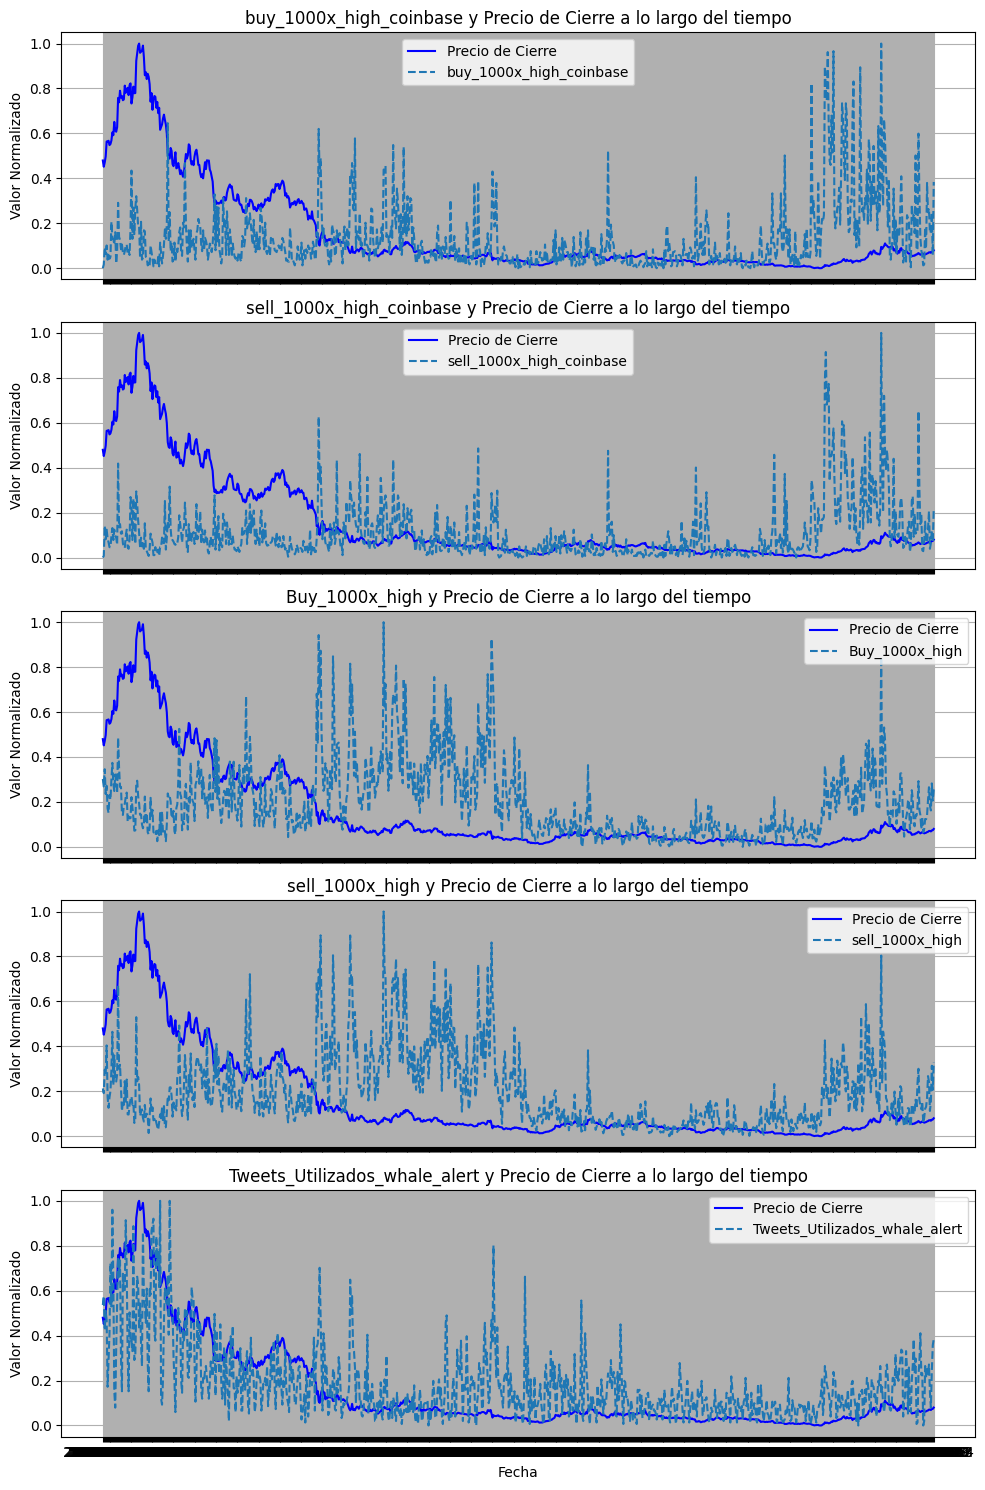

In [79]:
fig, axs = plt.subplots(5, 1, figsize=(10, 15), sharex=True)

# Escalar las variables de tweets
scaler = MinMaxScaler()
dataset[['buy_1000x_high_coinbase', 'sell_1000x_high_coinbase', 'Buy_1000x_high', 'sell_1000x_high', 'Tweets_Utilizados_whale_alert']] = scaler.fit_transform(dataset[['buy_1000x_high_coinbase', 'sell_1000x_high_coinbase', 'Buy_1000x_high', 'sell_1000x_high', 'Tweets_Utilizados_whale_alert']])

# Subgráficos para las variables de tweets
for i, var in enumerate(['buy_1000x_high_coinbase', 'sell_1000x_high_coinbase', 'Buy_1000x_high', 'sell_1000x_high', 'Tweets_Utilizados_whale_alert']):
    axs[i].plot(dataset['Open_time'], dataset['Close'], label='Precio de Cierre', color='blue')
    axs[i].plot(dataset['Open_time'], dataset[var], label=var, linestyle='--')
    axs[i].set_ylabel('Valor Normalizado')
    axs[i].set_title(f'{var} y Precio de Cierre a lo largo del tiempo')
    axs[i].legend()
    axs[i].grid(True)

axs[-1].set_xlabel('Fecha')

plt.tight_layout()
plt.show()

En los graficos anteriores, podemos observar cierta relacion entre la cantidad de "Grandes transacciones" realizadas en Coinbase y Binance con el valor de cierre de la moneda en estudio (en este caso Dot). Tambien podemos observar una mayor cantidad de "Whale alerts" acomulados en aquellos lugares donde el precio varia abruptamente.

### Grafico de tendencia

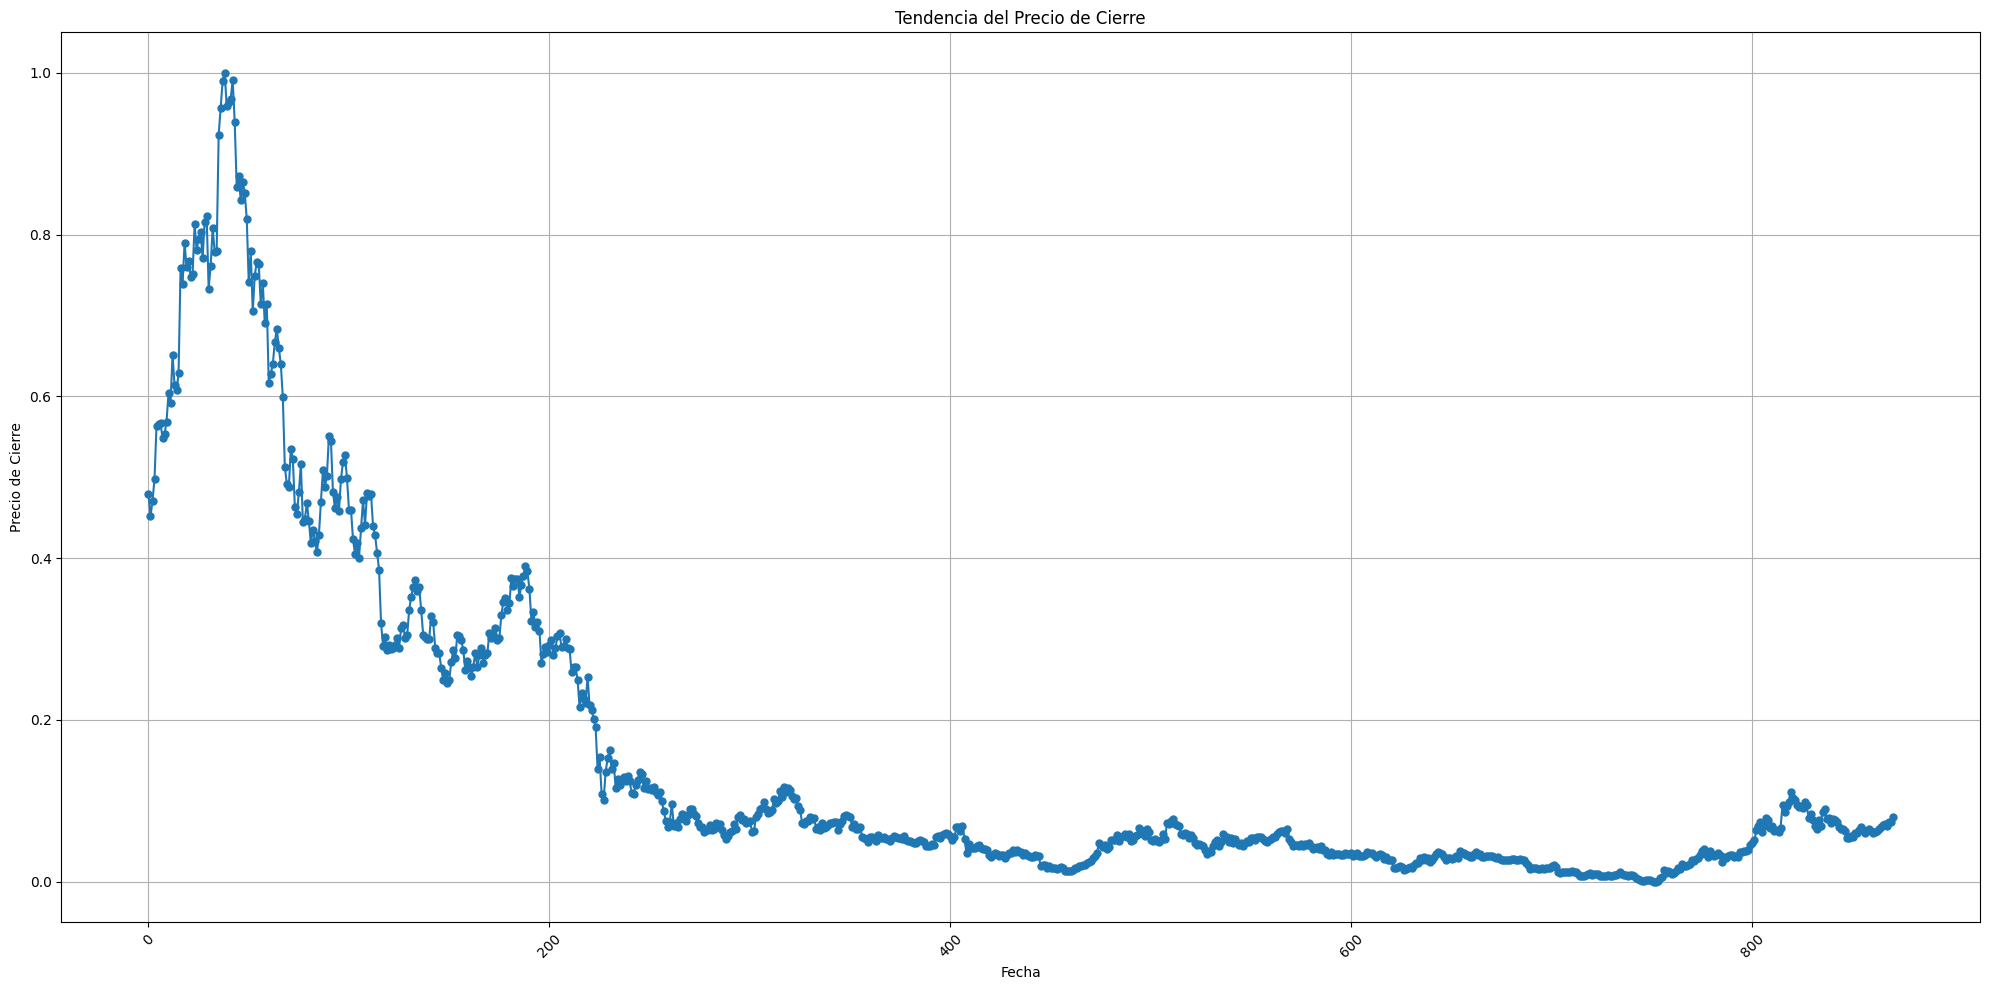

In [80]:
df = dataset

# Trazar el gráfico de tendencia
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['Close'], marker='o', markersize=5, linestyle='-')  # Ajustar el tamaño de los marcadores
plt.title('Tendencia del Precio de Cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Grafico de dispersion

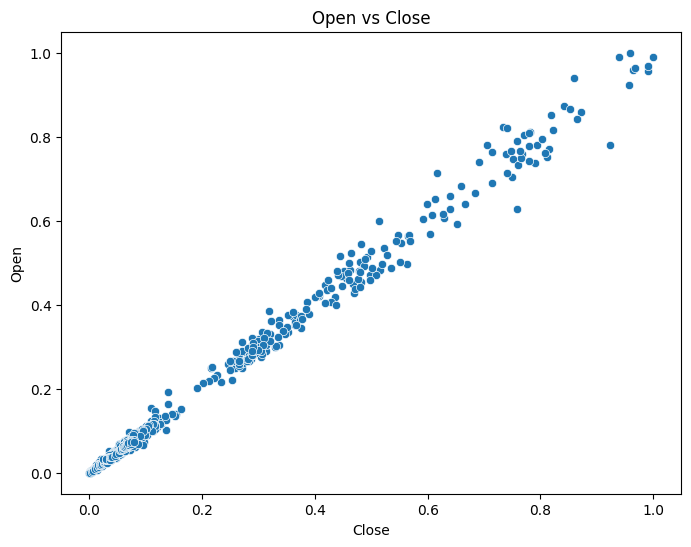

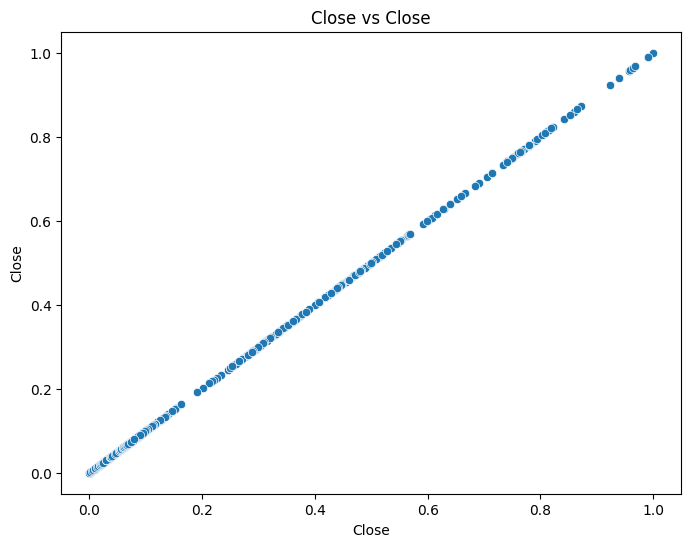

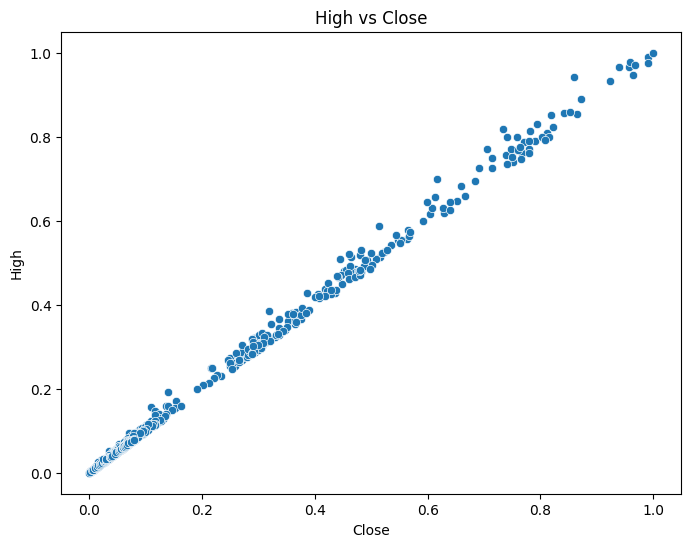

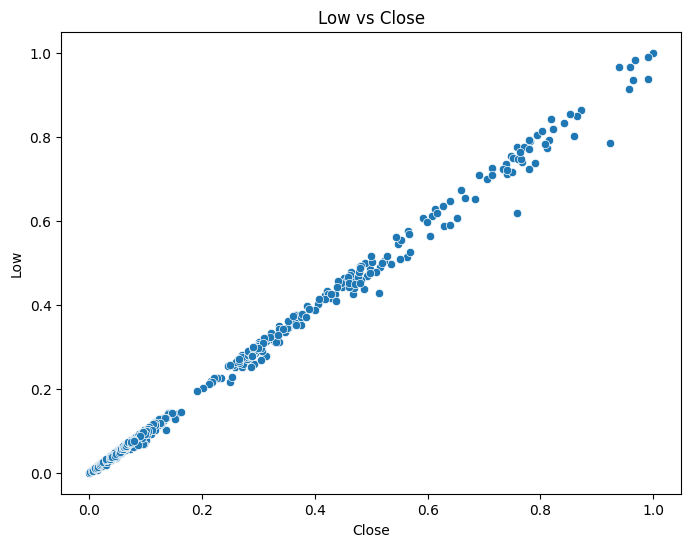

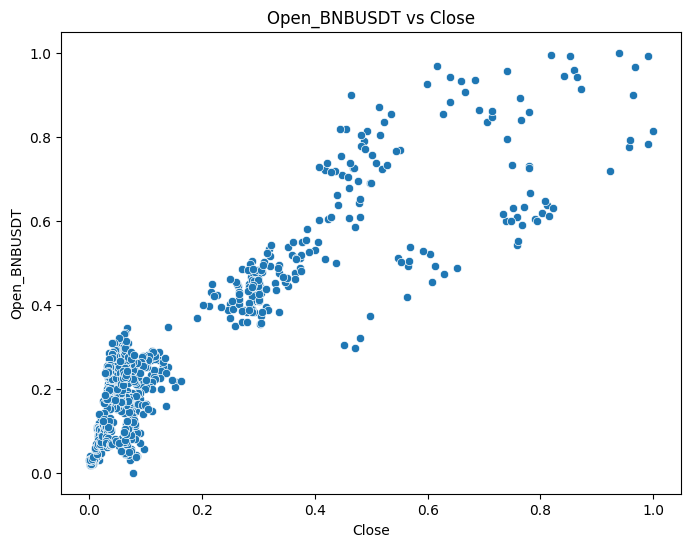

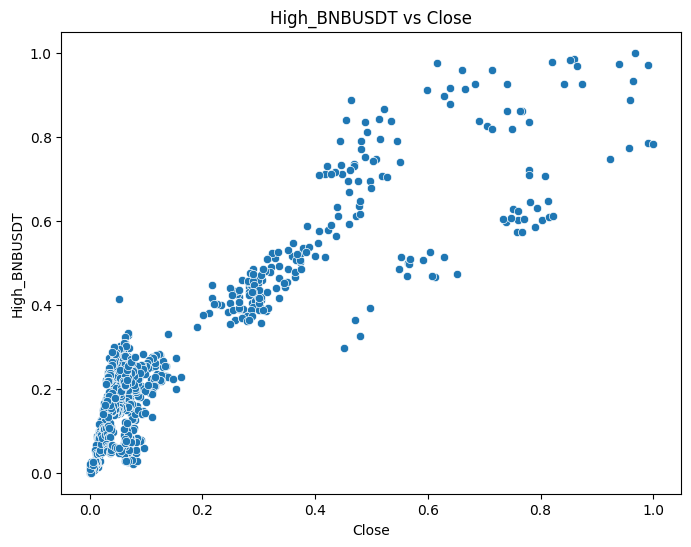

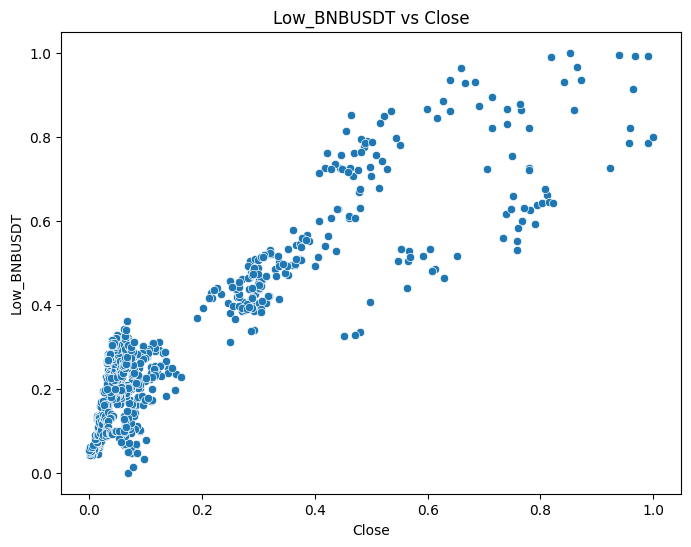

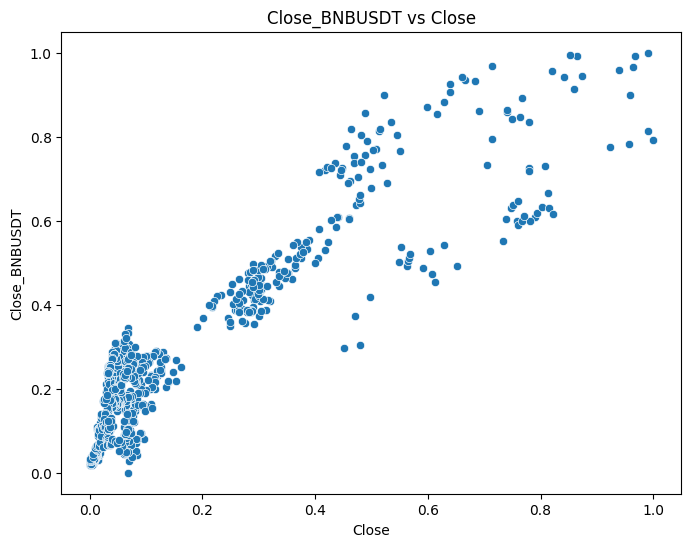

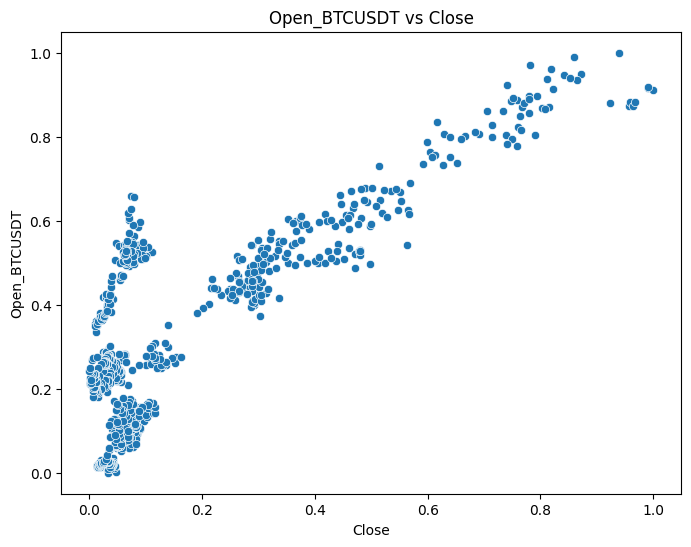

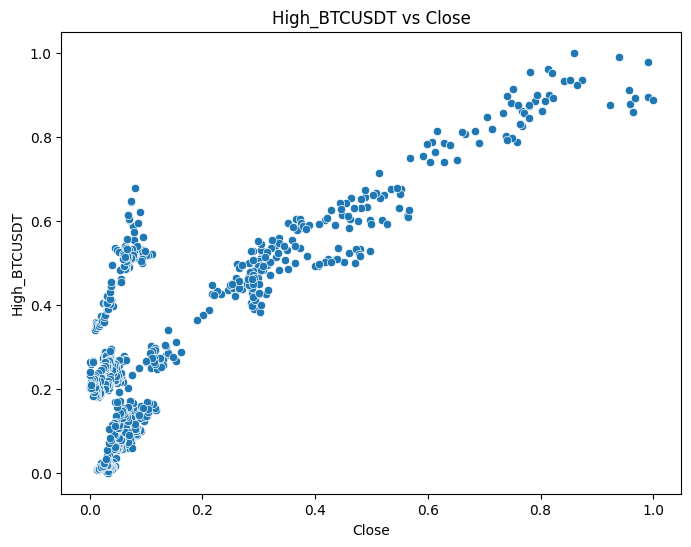

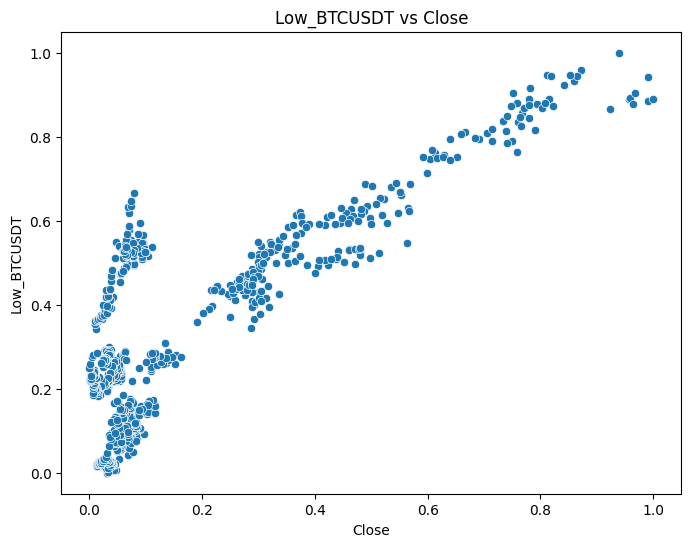

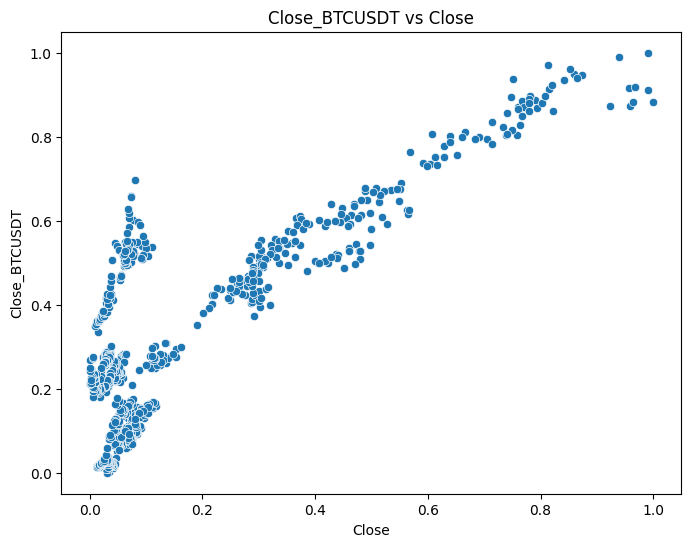

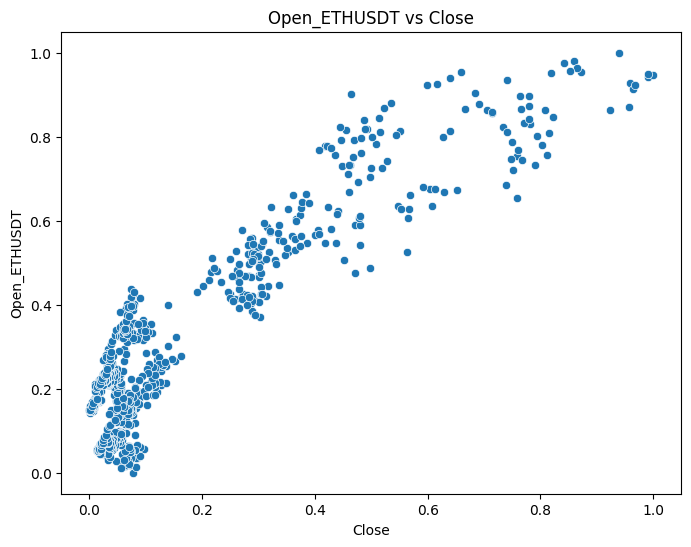

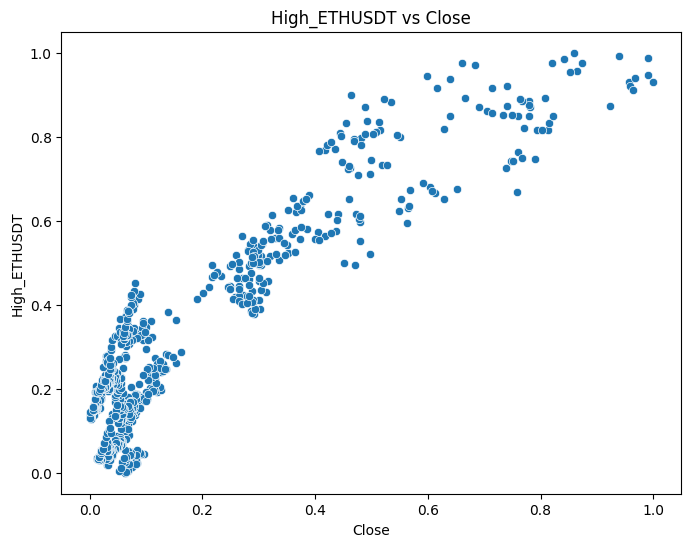

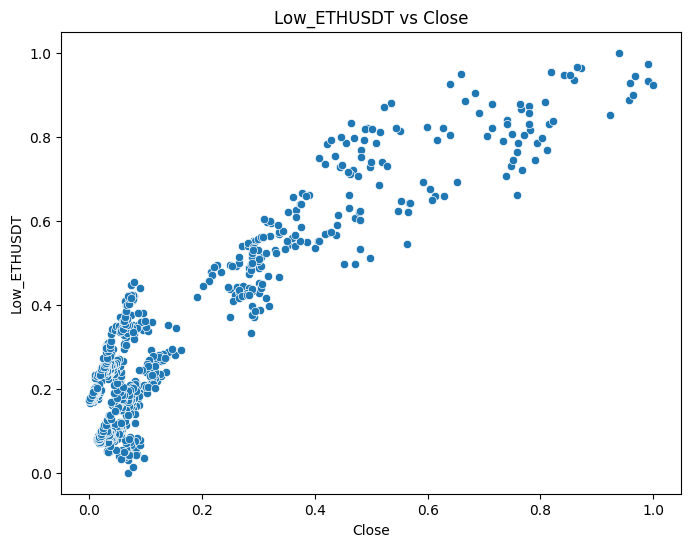

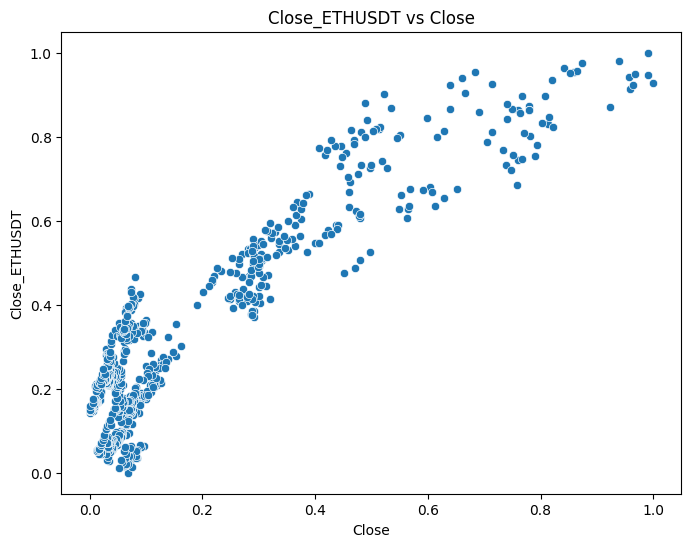

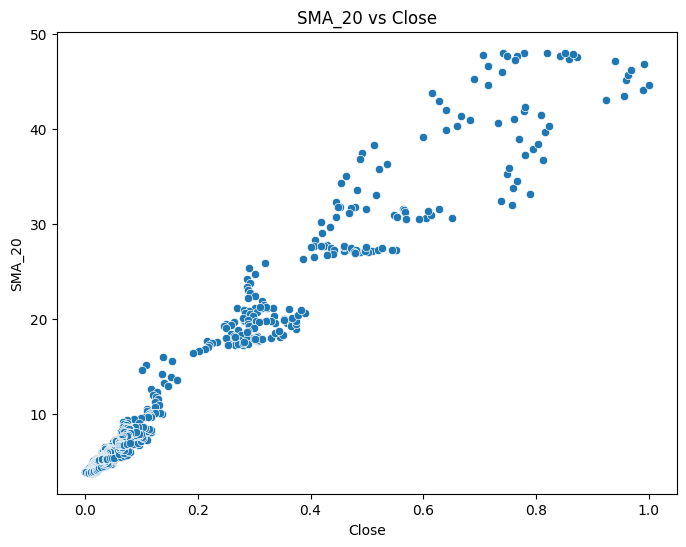

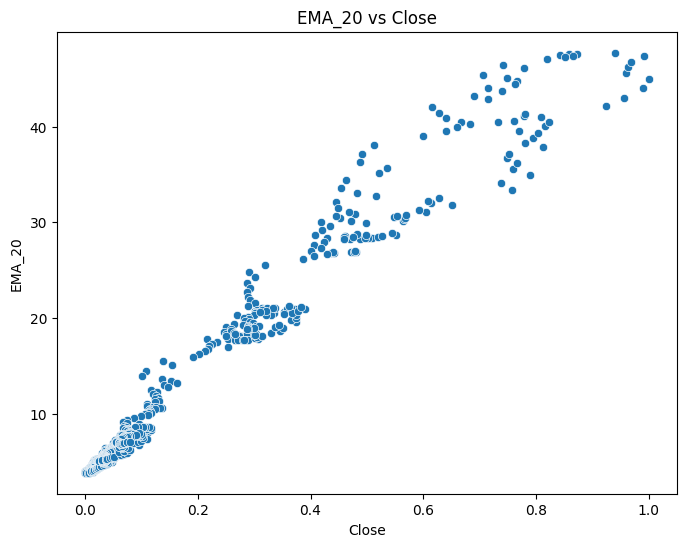

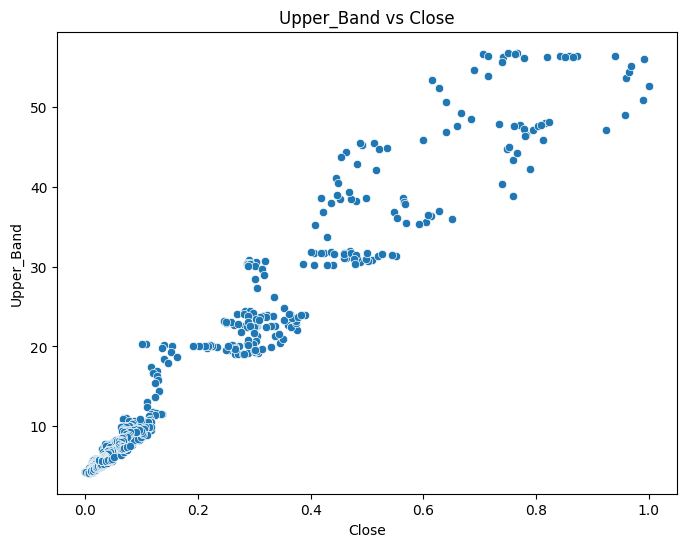

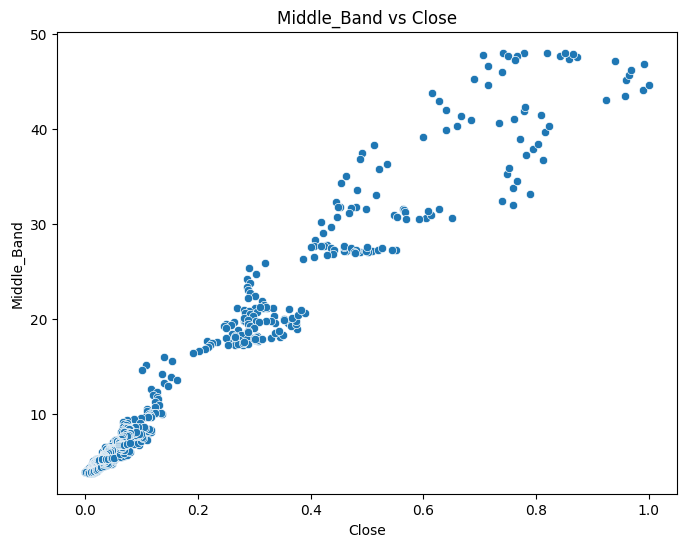

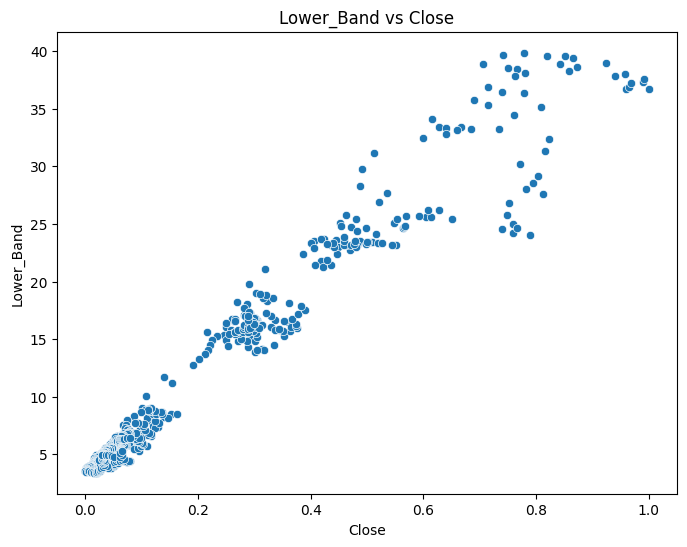

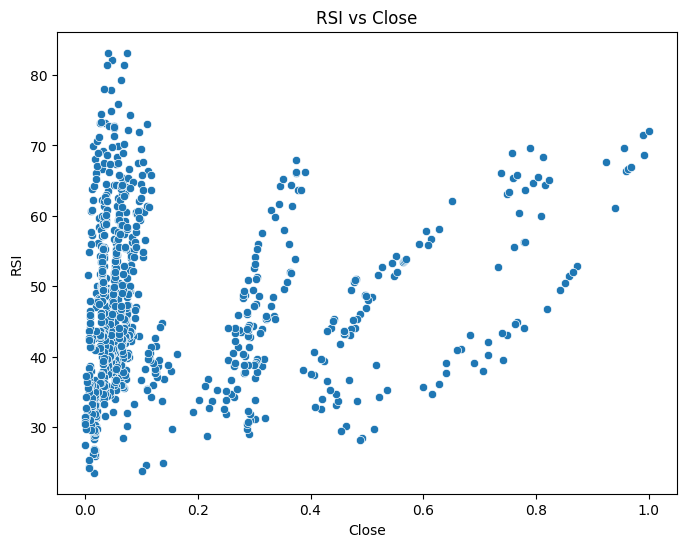

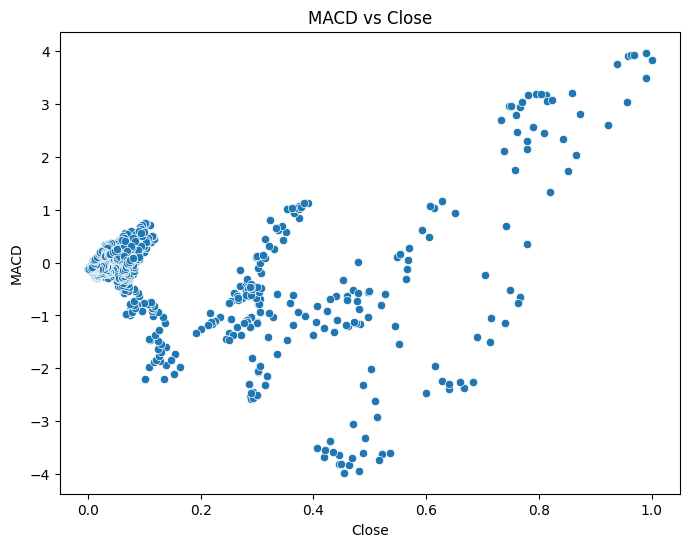

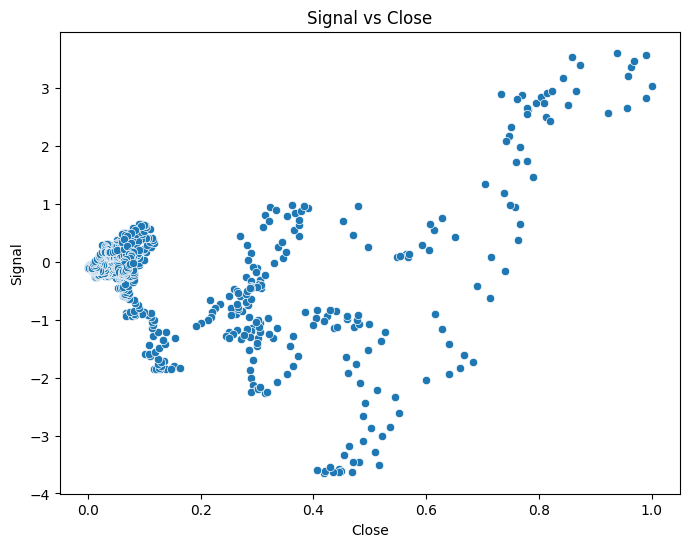

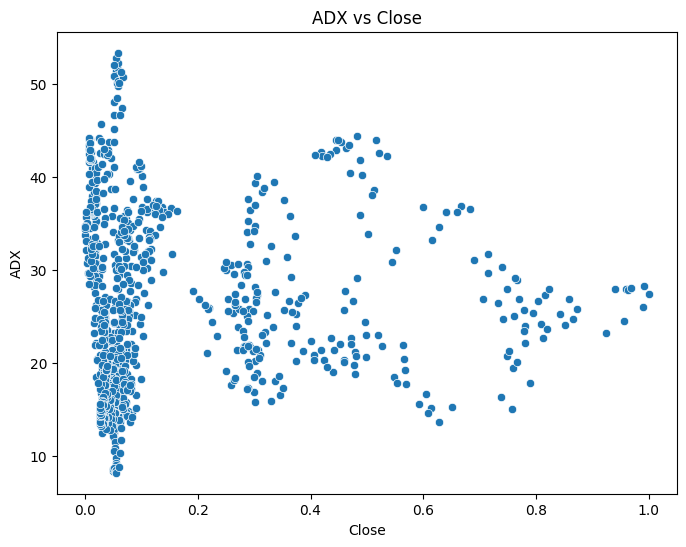

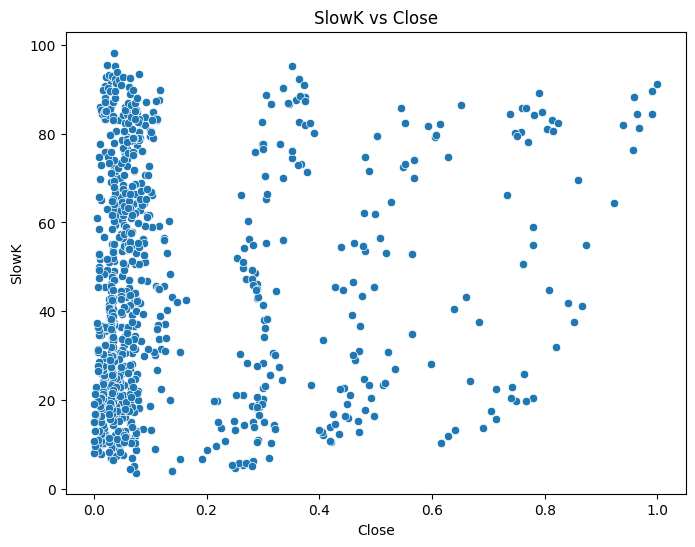

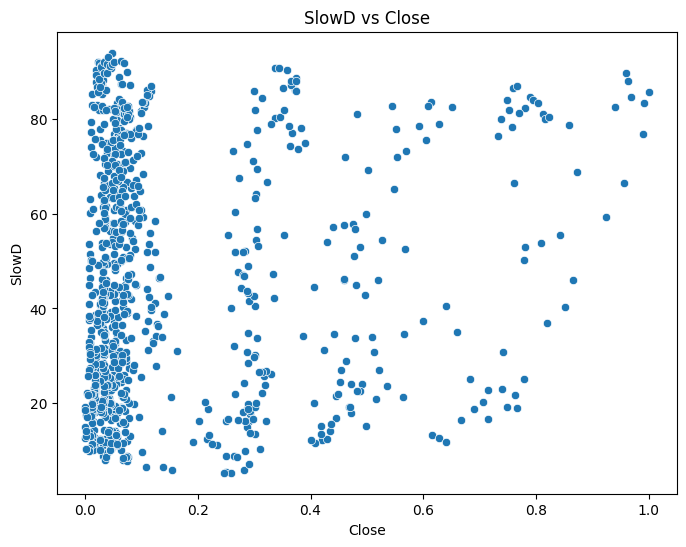

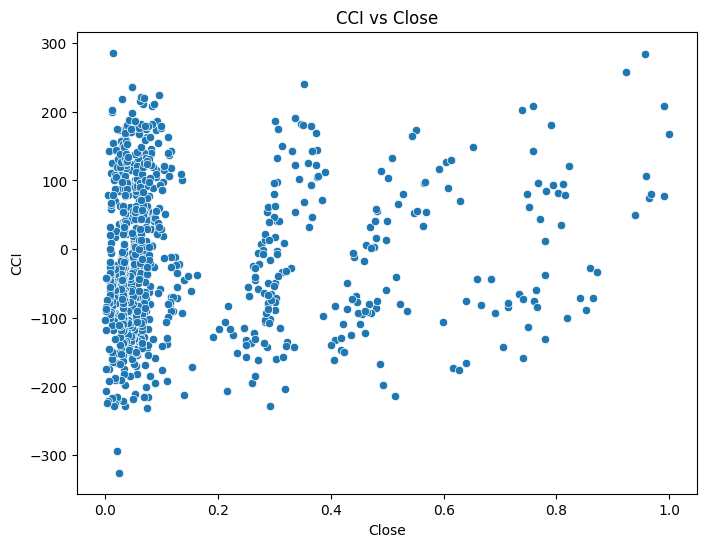

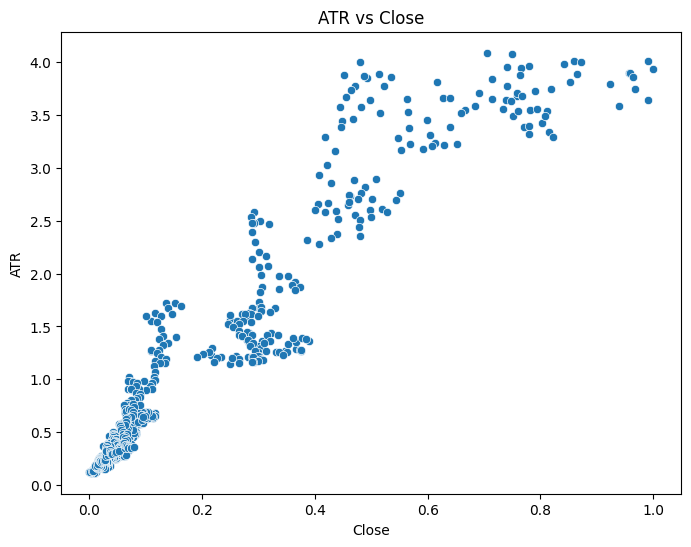

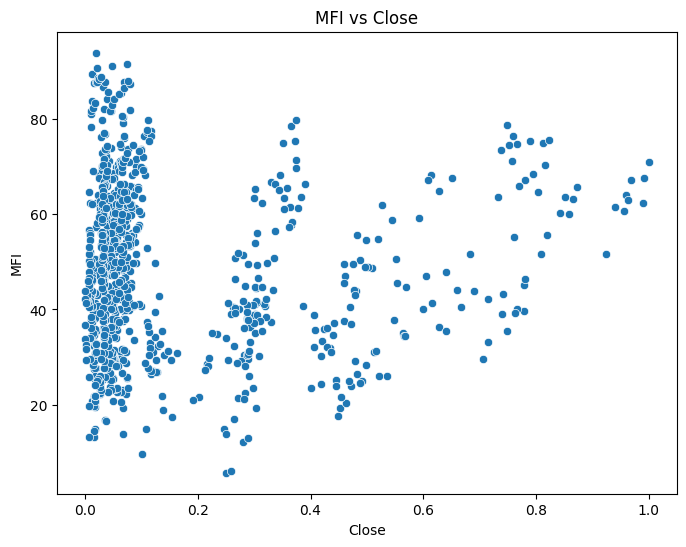

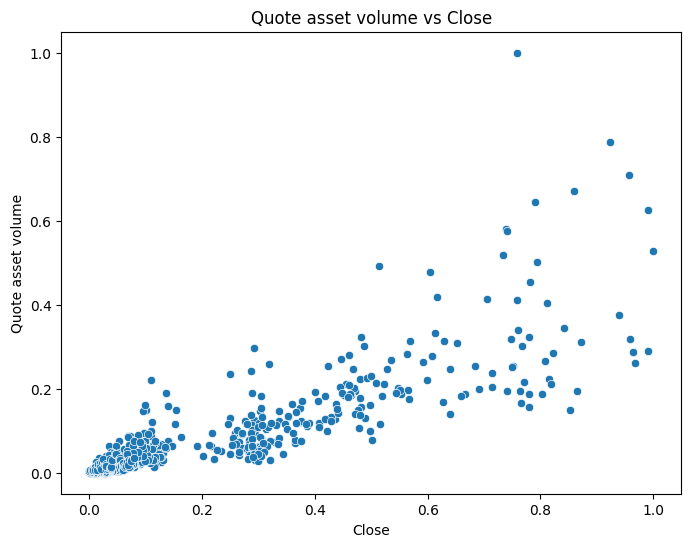

In [81]:
variables = [ 'Open', 'Close', 'High', 'Low',
            'Open_BNBUSDT', 'High_BNBUSDT', 'Low_BNBUSDT', 'Close_BNBUSDT',
             'Open_BTCUSDT', 'High_BTCUSDT', 'Low_BTCUSDT', 'Close_BTCUSDT',
             'Open_ETHUSDT', 'High_ETHUSDT', 'Low_ETHUSDT', 'Close_ETHUSDT',
             'SMA_20', 'EMA_20', 'Upper_Band', 'Middle_Band', 'Lower_Band',
             'RSI', 'MACD', 'Signal', 'ADX', 'SlowK', 'SlowD', 'CCI', 'ATR', 'MFI', 'Quote asset volume']

# Crear gráficos de dispersión para cada variable
for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Close', y=variable, data=dataset)
    plt.title(f'{variable} vs Close')
    plt.xlabel('Close')
    plt.ylabel(variable)
    plt.show()

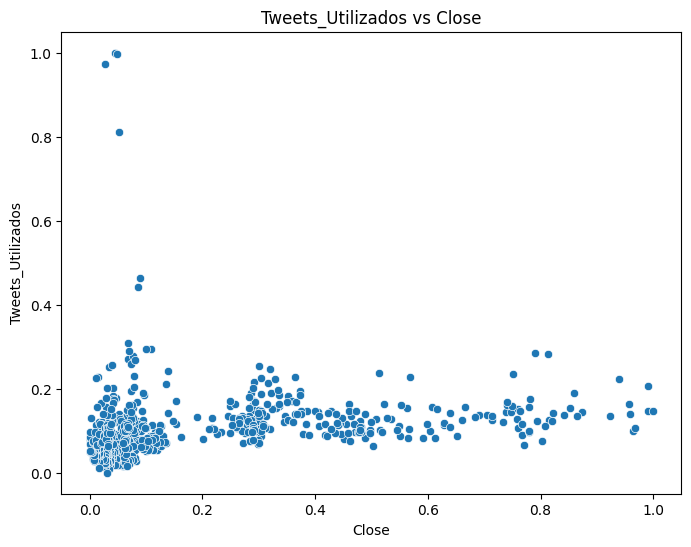

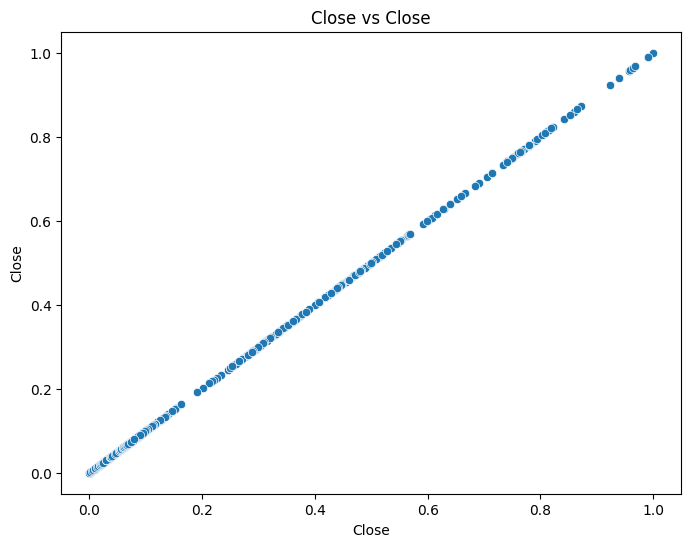

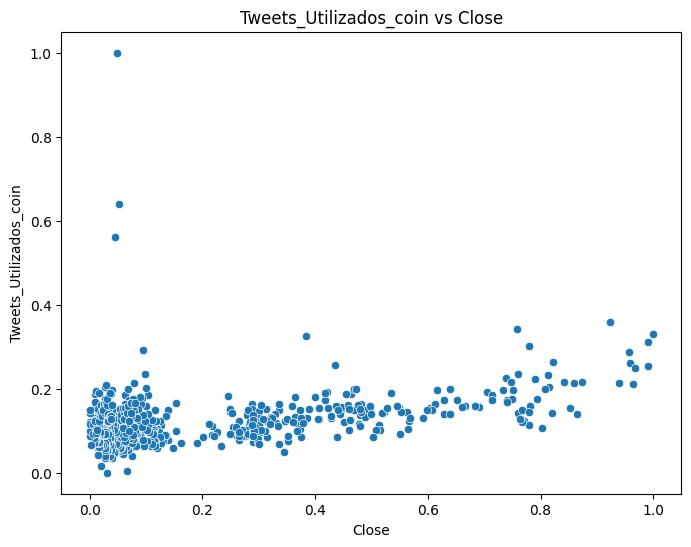

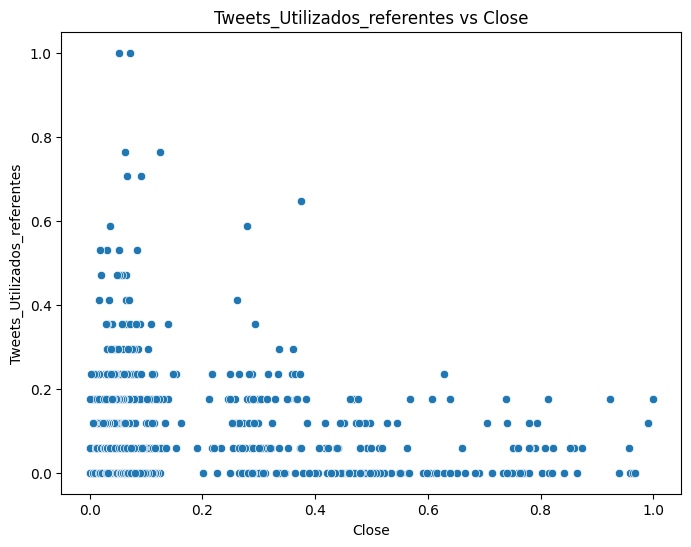

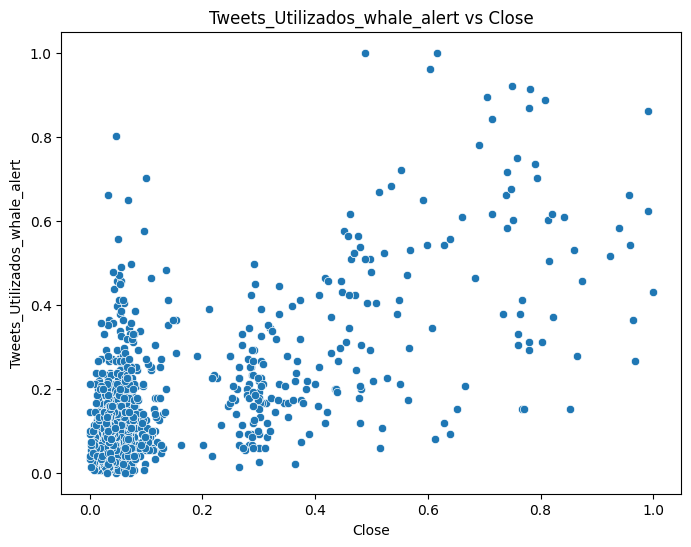

In [82]:
variables = [ 'Tweets_Utilizados', 'Close', 'Tweets_Utilizados_coin', 'Tweets_Utilizados_referentes', 'Tweets_Utilizados_whale_alert']

# Crear gráficos de dispersión para cada variable
for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Close', y=variable, data=dataset)
    plt.title(f'{variable} vs Close')
    plt.xlabel('Close')
    plt.ylabel(variable)
    plt.show()

De los graficos anteiores, podemos observar ciertas relaciones con la variable Close

- Lineales o cerca a lineal:
    - Open
    - High
    - Low
    - Close
    - Quote asset volume
    - Open_BNBUSDT
    - High_BNBUSDT
    - Low_BNBUSDT
    - Close_BNBUSDT
    - Open_BTCUSDT
    - High_BTCUSDT
    - Low_BTCUSDT
    - Close_BTCUSDT
    - Open_ETHUSDT
    - High_ETHUSDT
    - Low_ETHUSDT
    - Close_ETHUSDT
    - SMA_20
    - EMA_2O
    - Upper_Band
    - Middle_Band
    - Lower_Band
    - ATR

- Relacion NO lineal:
    - RSI 
    - MACD
    - SIGNAL
    - MFI


### Grafico de densidad

/var/folders/ls/f33jscqd6sb6bd857yb2j2s00000gp/T/ipykernel_99511/1366752176.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[variable], label=variable, shade=True)
/var/folders/ls/f33jscqd6sb6bd857yb2j2s00000gp/T/ipykernel_99511/1366752176.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[variable], label=variable, shade=True)
/var/folders/ls/f33jscqd6sb6bd857yb2j2s00000gp/T/ipykernel_99511/1366752176.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[variable], label=variable, shade=True)
/var/folders/ls/f33jscqd6sb6bd857yb2j2s00000gp/T/ipykernel_99511/1366752176.py:13: FutureWarning: 



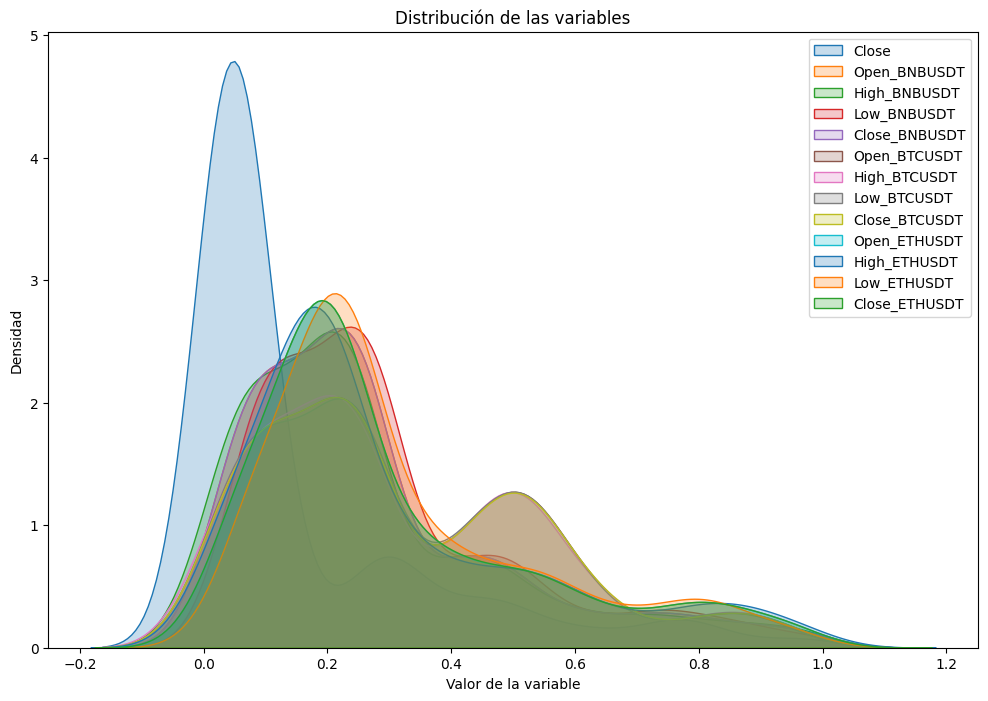

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables para visualizar las densidades
variables = ['Close', 'Open_BNBUSDT', 'High_BNBUSDT', 'Low_BNBUSDT', 'Close_BNBUSDT',
             'Open_BTCUSDT', 'High_BTCUSDT', 'Low_BTCUSDT', 'Close_BTCUSDT',
             'Open_ETHUSDT', 'High_ETHUSDT', 'Low_ETHUSDT', 'Close_ETHUSDT']

# Crear gráfico de densidad superpuesto para todas las variables
plt.figure(figsize=(12, 8))
for variable in variables:
    sns.kdeplot(dataset[variable], label=variable, shade=True)

plt.title('Distribución de las variables')
plt.xlabel('Valor de la variable')
plt.ylabel('Densidad')
plt.legend()
plt.show()


/var/folders/ls/f33jscqd6sb6bd857yb2j2s00000gp/T/ipykernel_99511/2971211805.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_scaled1[variable], label=variable, shade=True)
/var/folders/ls/f33jscqd6sb6bd857yb2j2s00000gp/T/ipykernel_99511/2971211805.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_scaled1[variable], label=variable, shade=True)
/var/folders/ls/f33jscqd6sb6bd857yb2j2s00000gp/T/ipykernel_99511/2971211805.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_scaled1[variable], label=variable, shade=True)
/var/folders/ls/f33jscqd6sb6bd857yb2j2s00000gp/T/ipykernel_99511/2971211805.py:19: Fu

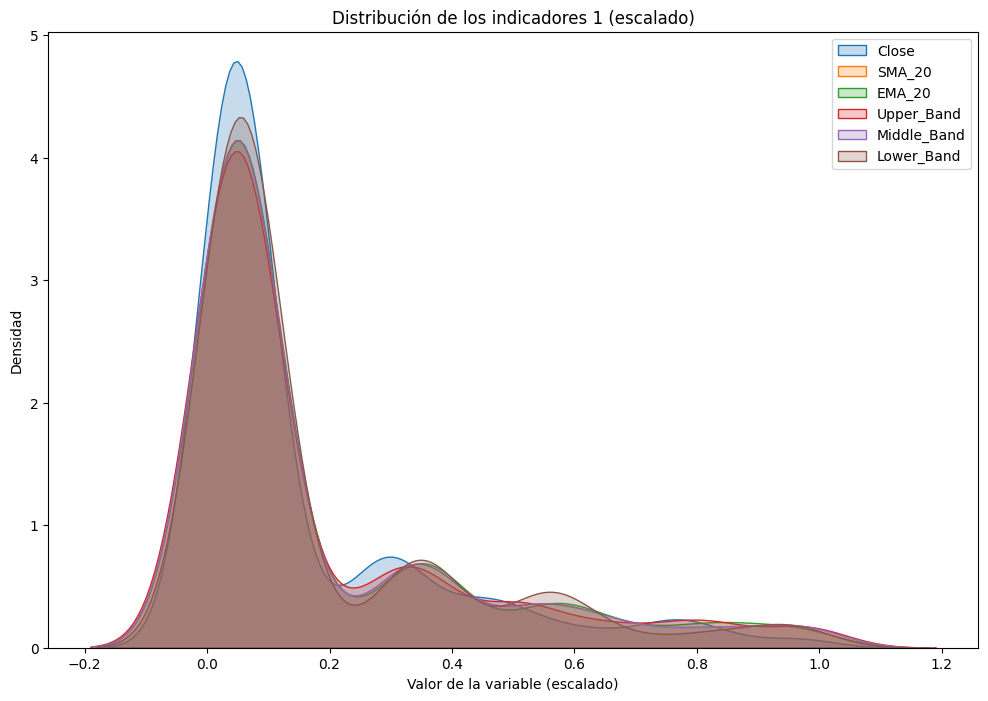

/var/folders/ls/f33jscqd6sb6bd857yb2j2s00000gp/T/ipykernel_99511/2971211805.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_scaled2[variable], label=variable, shade=True)
/var/folders/ls/f33jscqd6sb6bd857yb2j2s00000gp/T/ipykernel_99511/2971211805.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_scaled2[variable], label=variable, shade=True)
/var/folders/ls/f33jscqd6sb6bd857yb2j2s00000gp/T/ipykernel_99511/2971211805.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_scaled2[variable], label=variable, shade=True)
/var/folders/ls/f33jscqd6sb6bd857yb2j2s00000gp/T/ipykernel_99511/2971211805.py:30: Fu

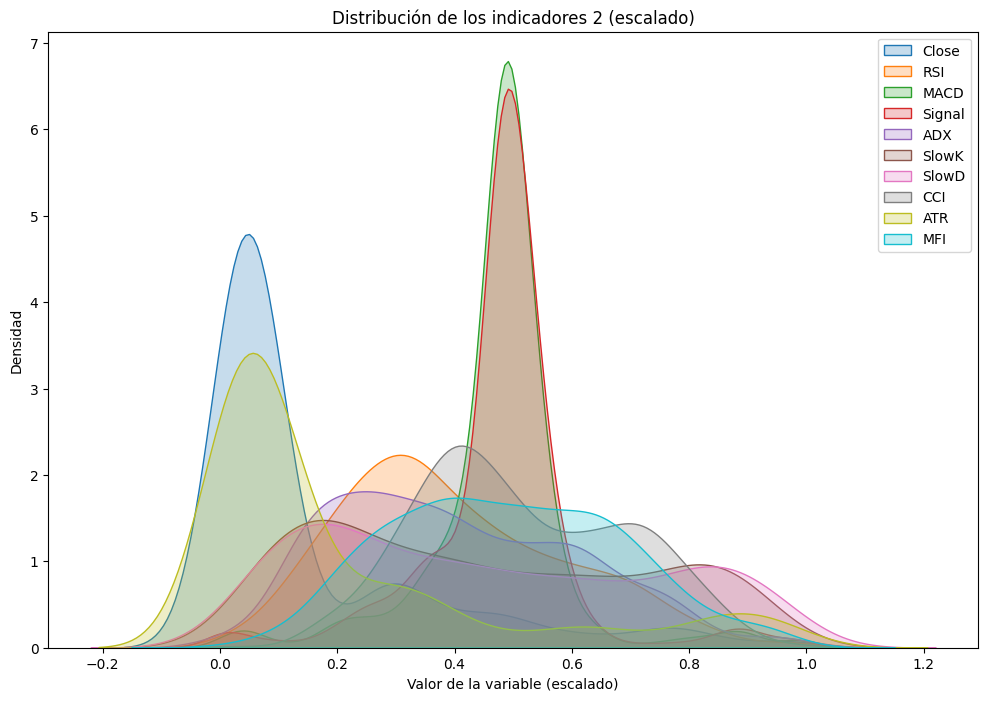

In [84]:
indicadores1 = ['Close', 'SMA_20', 'EMA_20', 'Upper_Band', 'Middle_Band', 'Lower_Band']
indicadores2 = ['Close', 'RSI', 'MACD', 'Signal', 'ADX', 'SlowK', 'SlowD', 'CCI', 'ATR', 'MFI']

# Escalar los datos de los indicadores1
scaler1 = MinMaxScaler()
data_scaled1 = scaler1.fit_transform(dataset[indicadores1])

# Escalar los datos de los indicadores2
scaler2 = MinMaxScaler()
data_scaled2 = scaler2.fit_transform(dataset[indicadores2])

# Convertir los datos escalados en DataFrames
data_scaled1 = pd.DataFrame(data_scaled1, columns=indicadores1)
data_scaled2 = pd.DataFrame(data_scaled2, columns=indicadores2)

# Crear gráfico de densidad superpuesto para indicadores1 escalados
plt.figure(figsize=(12, 8))
for variable in indicadores1:
    sns.kdeplot(data_scaled1[variable], label=variable, shade=True)

plt.title('Distribución de los indicadores 1 (escalado)')
plt.xlabel('Valor de la variable (escalado)')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Crear gráfico de densidad superpuesto para indicadores2 escalados
plt.figure(figsize=(12, 8))
for variable in indicadores2:
    sns.kdeplot(data_scaled2[variable], label=variable, shade=True)

plt.title('Distribución de los indicadores 2 (escalado)')
plt.xlabel('Valor de la variable (escalado)')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Podemos observar que las variables del primer grafico de distribucion, y el primero grupo de indicadores (EMA_20, SMA_20, etc) tienen una distribucion similar a la variable Close.

Del ultimo grafico, podemos bservar que el RSI y MACD, tienen una distribucion parecida pero desplazada (o en espejo).

### Histogramas

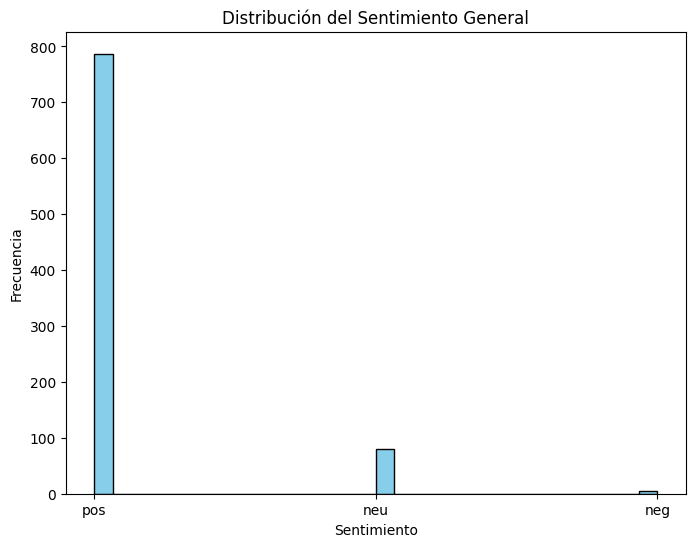

In [85]:
plt.figure(figsize=(8, 6))
plt.hist(dataset['Sentimiento'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución del Sentimiento General')
plt.show()

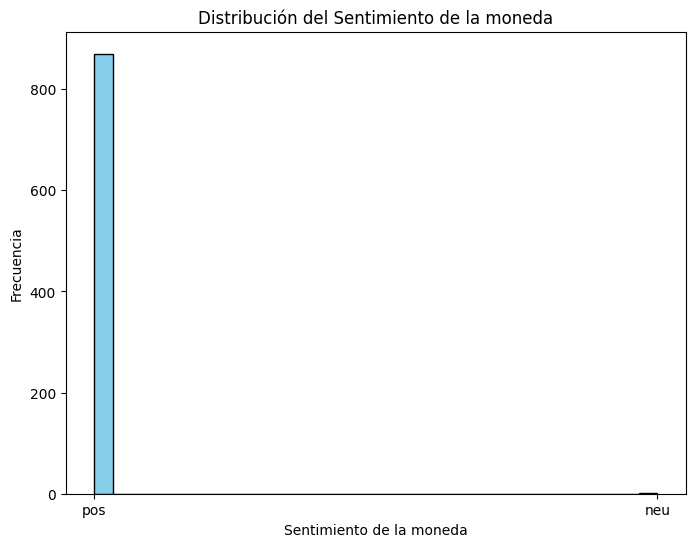

In [86]:
plt.figure(figsize=(8, 6))
plt.hist(dataset['Sentimiento_coin'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sentimiento de la moneda')
plt.ylabel('Frecuencia')
plt.title('Distribución del Sentimiento de la moneda')
plt.show()

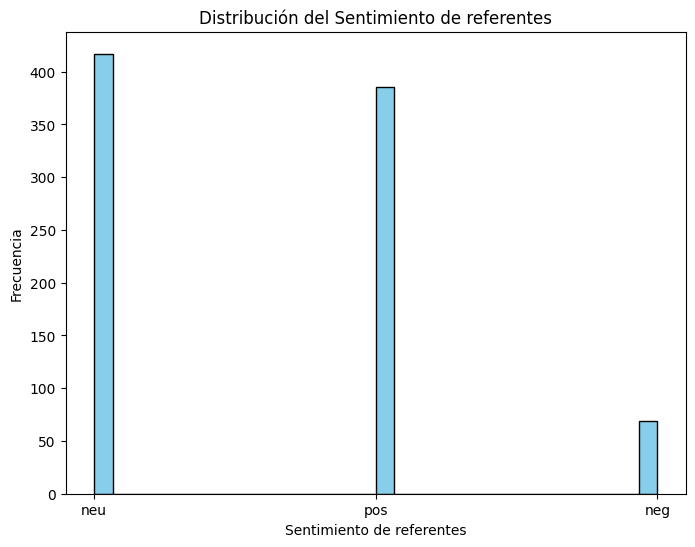

In [87]:
plt.figure(figsize=(8, 6))
plt.hist(dataset['Sentimiento_referentes'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sentimiento de referentes')
plt.ylabel('Frecuencia')
plt.title('Distribución del Sentimiento de referentes')
plt.show()

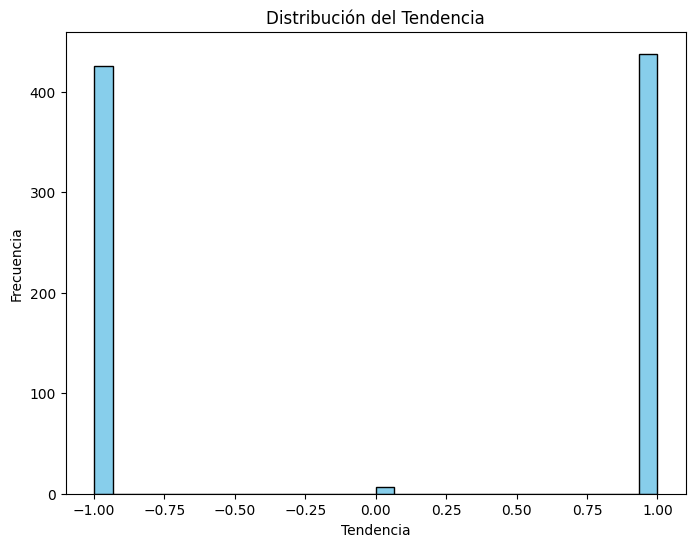

In [88]:
plt.figure(figsize=(8, 6))
plt.hist(dataset['Tendencia'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Tendencia')
plt.ylabel('Frecuencia')
plt.title('Distribución del Tendencia')
plt.show()

Obsevamos que las clases estan balanceadas (para Tendencia), pero en cuanto al sentimiento, medido en nivel general, siempre (o casi) tiende a ser positivo, por esto (y lo visto en los raficos de correlacion) es que tendria mas sentido tomar la CANTIDAD de comentarios en vez del sentimiento promedio.

### Correlograma

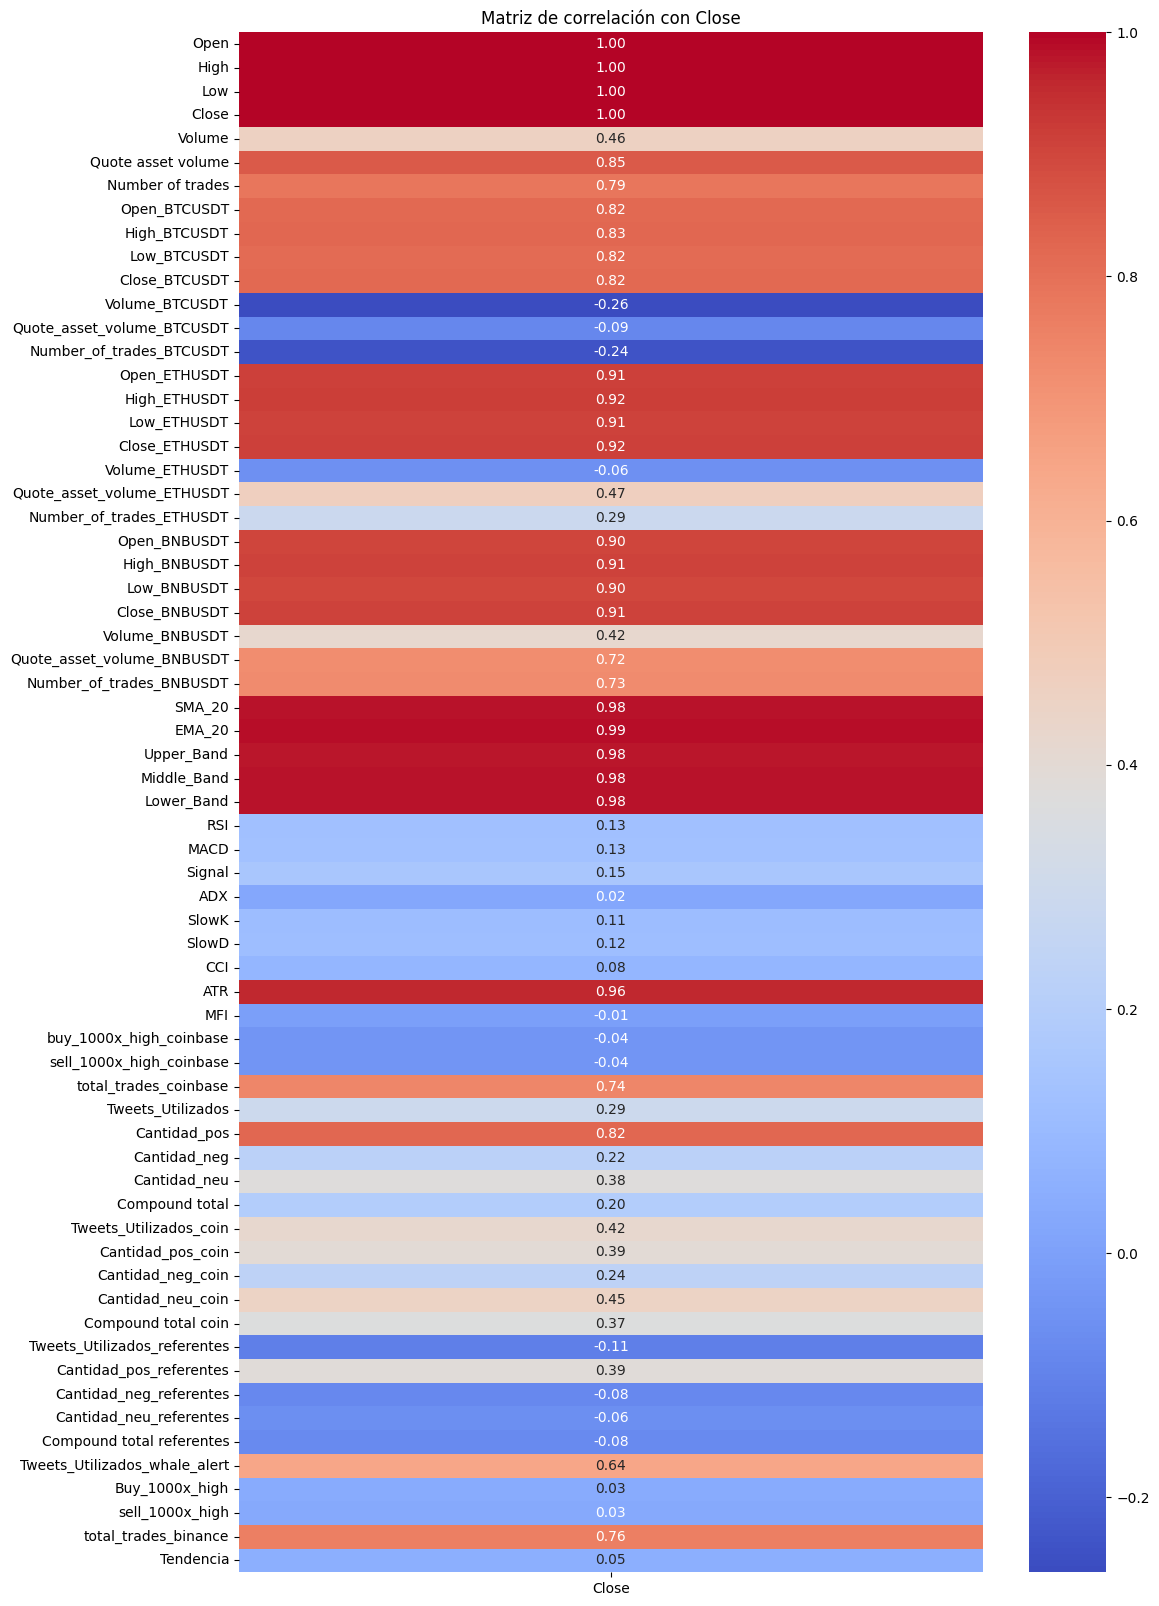

In [89]:
data = dataset.drop('Open_time', axis=1)
data = data.drop('Sentimiento', axis=1)
data = data.drop('Sentimiento_coin', axis=1)
data = data.drop('Sentimiento_referentes', axis=1)

correlation_matrix = data.corr()

# Visualizar matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 20))
sns.heatmap(correlation_matrix[['Close']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación con Close')
plt.show()

# display(correlation_matrix.tail(35))

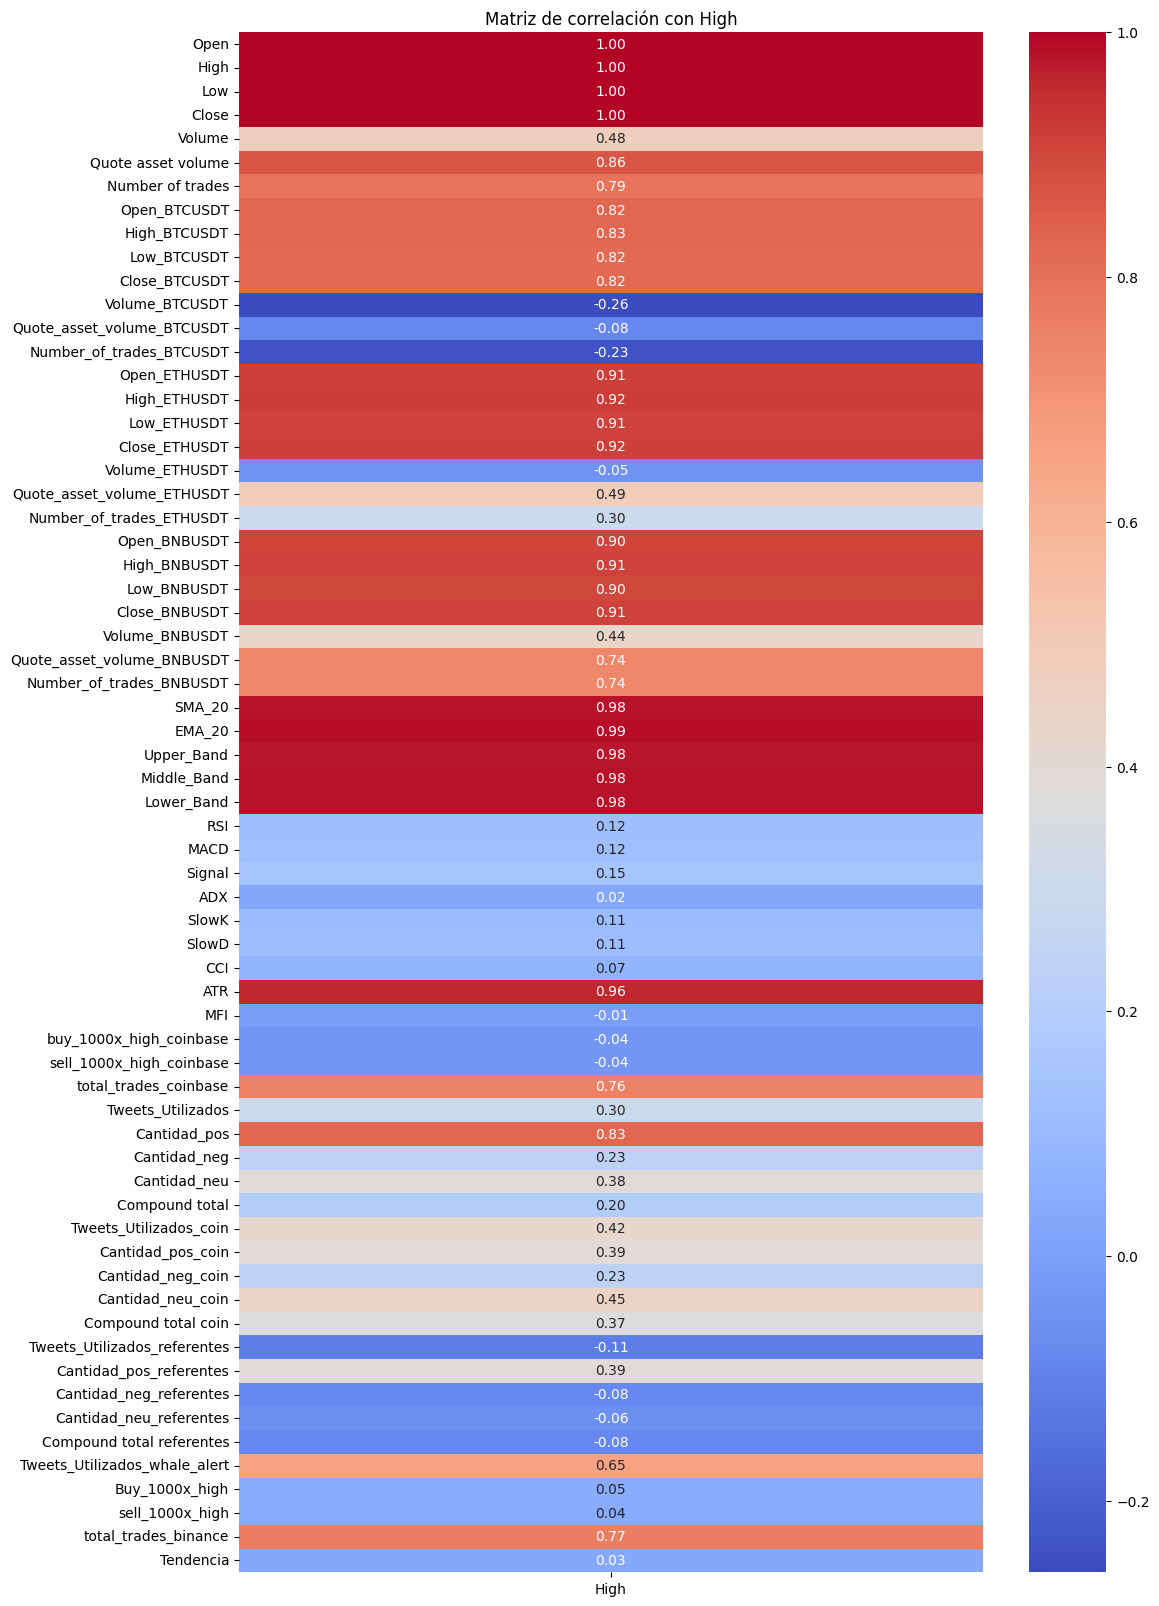

In [90]:
data = dataset.drop('Open_time', axis=1)
data = data.drop('Sentimiento', axis=1)
data = data.drop('Sentimiento_coin', axis=1)
data = data.drop('Sentimiento_referentes', axis=1)

correlation_matrix = data.corr()

# Visualizar matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 20))
sns.heatmap(correlation_matrix[['High']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación con High')
plt.show()

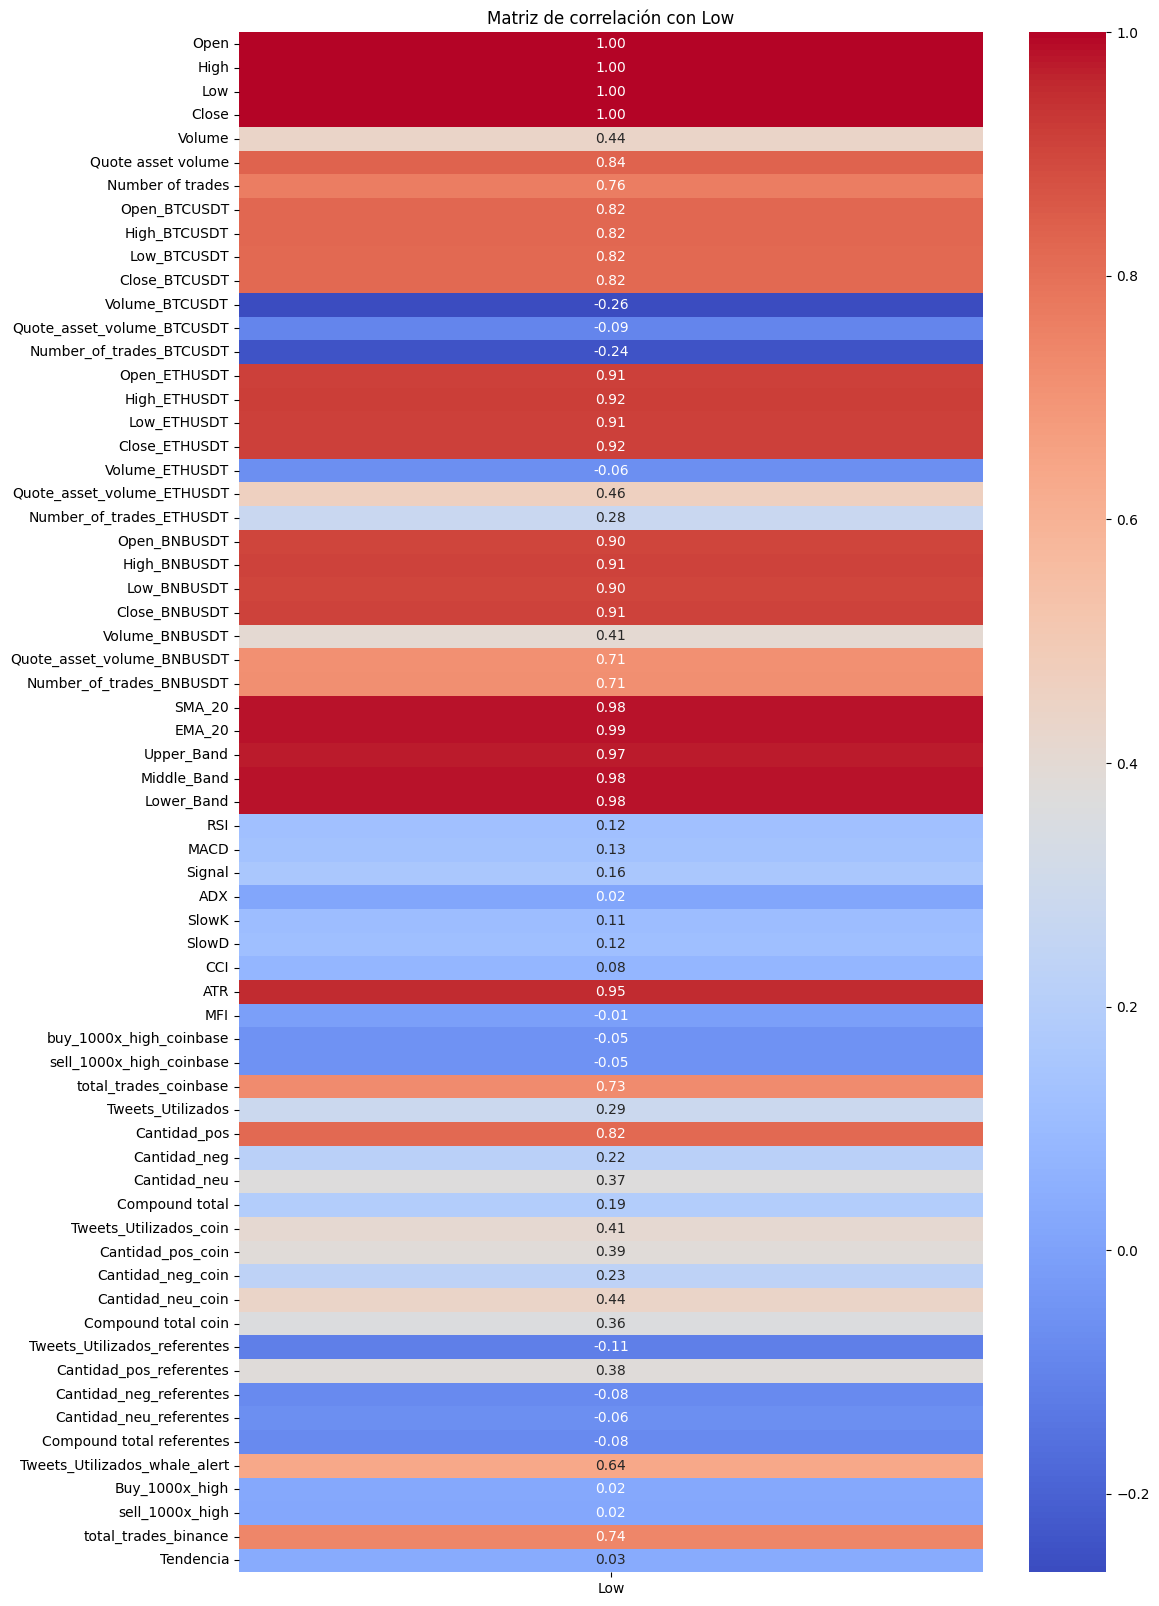

In [91]:
data = dataset.drop('Open_time', axis=1)
data = data.drop('Sentimiento', axis=1)
data = data.drop('Sentimiento_coin', axis=1)
data = data.drop('Sentimiento_referentes', axis=1)

correlation_matrix = data.corr()

# Visualizar matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 20))
sns.heatmap(correlation_matrix[['Low']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación con Low')
plt.show()

De los graficos de dispersion, pude observar que ciertas variables aparentar presentar una correlacion NO lineal, por lo que procedere a calcular los coeficientes de correlacion mediante Spearman y Kendall.

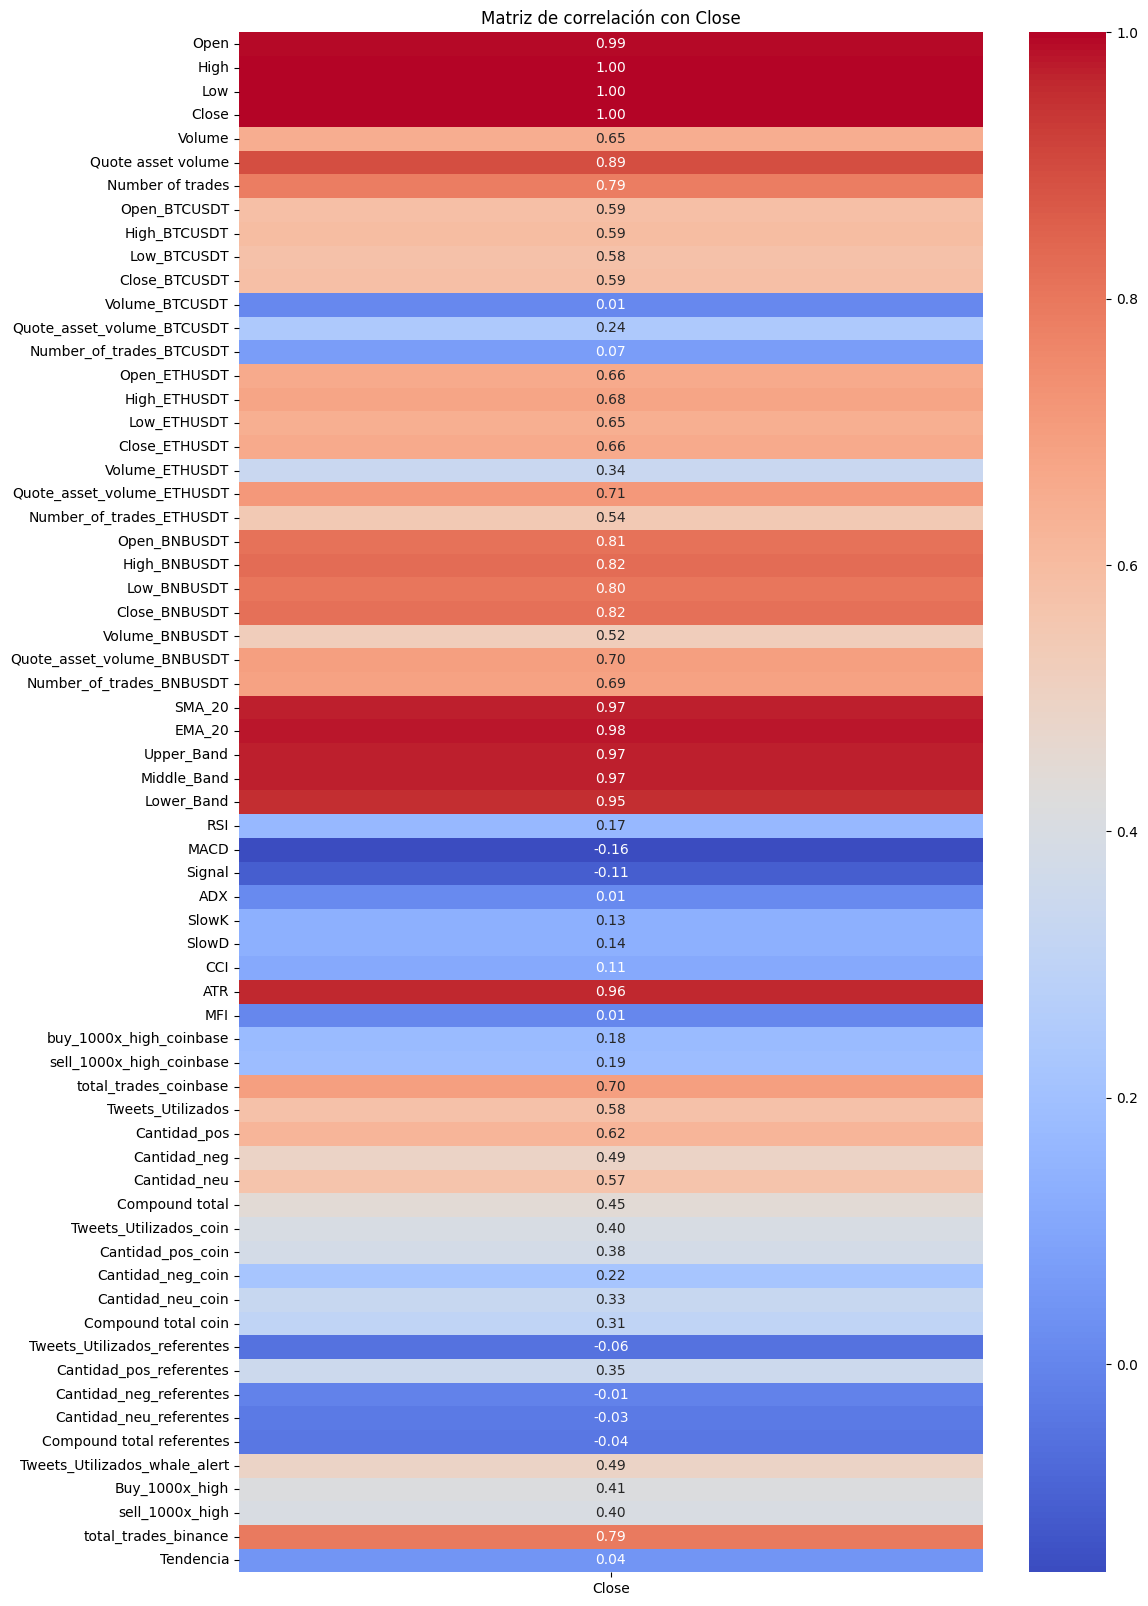

In [92]:
data = dataset.drop('Open_time', axis=1)
data = data.drop('Sentimiento', axis=1)
data = data.drop('Sentimiento_coin', axis=1)
data = data.drop('Sentimiento_referentes', axis=1)

correlation_matrix_spearman = data.corr(method='spearman')

# Visualizar matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 20))
sns.heatmap(correlation_matrix_spearman[['Close']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación con Close')
plt.show()

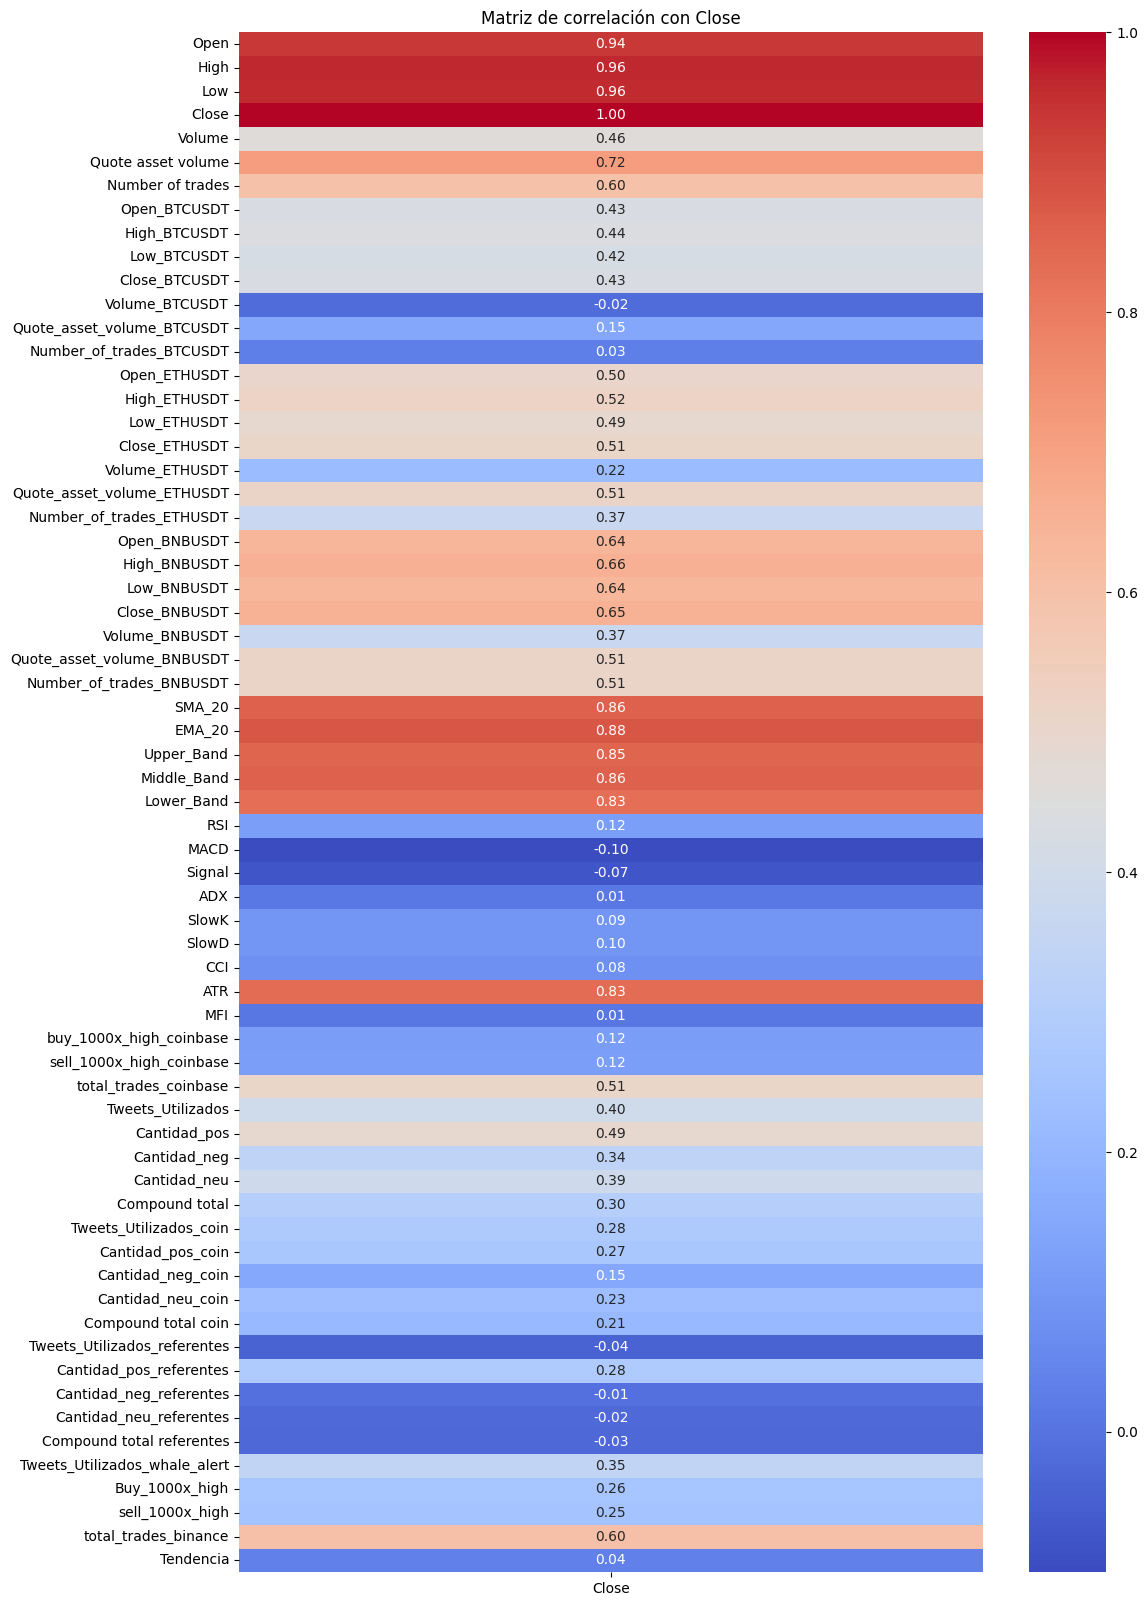

In [93]:
data = dataset.drop('Open_time', axis=1)
data = data.drop('Sentimiento', axis=1)
data = data.drop('Sentimiento_coin', axis=1)
data = data.drop('Sentimiento_referentes', axis=1)

correlation_matrix_kendall = data.corr(method='kendall')

# Visualizar matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 20))
sns.heatmap(correlation_matrix_kendall[['Close']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación con Close')
plt.show()

In [94]:
dataset.isnull().sum()

Open_time                        0
Open                             0
High                             0
Low                              0
Close                            0
                                ..
Tweets_Utilizados_whale_alert    0
Buy_1000x_high                   0
sell_1000x_high                  0
total_trades_binance             0
Tendencia                        0
Length: 69, dtype: int64

Agrego una ultima metrica de correlacion, el coeficiente de correlacion de rango poliserial:

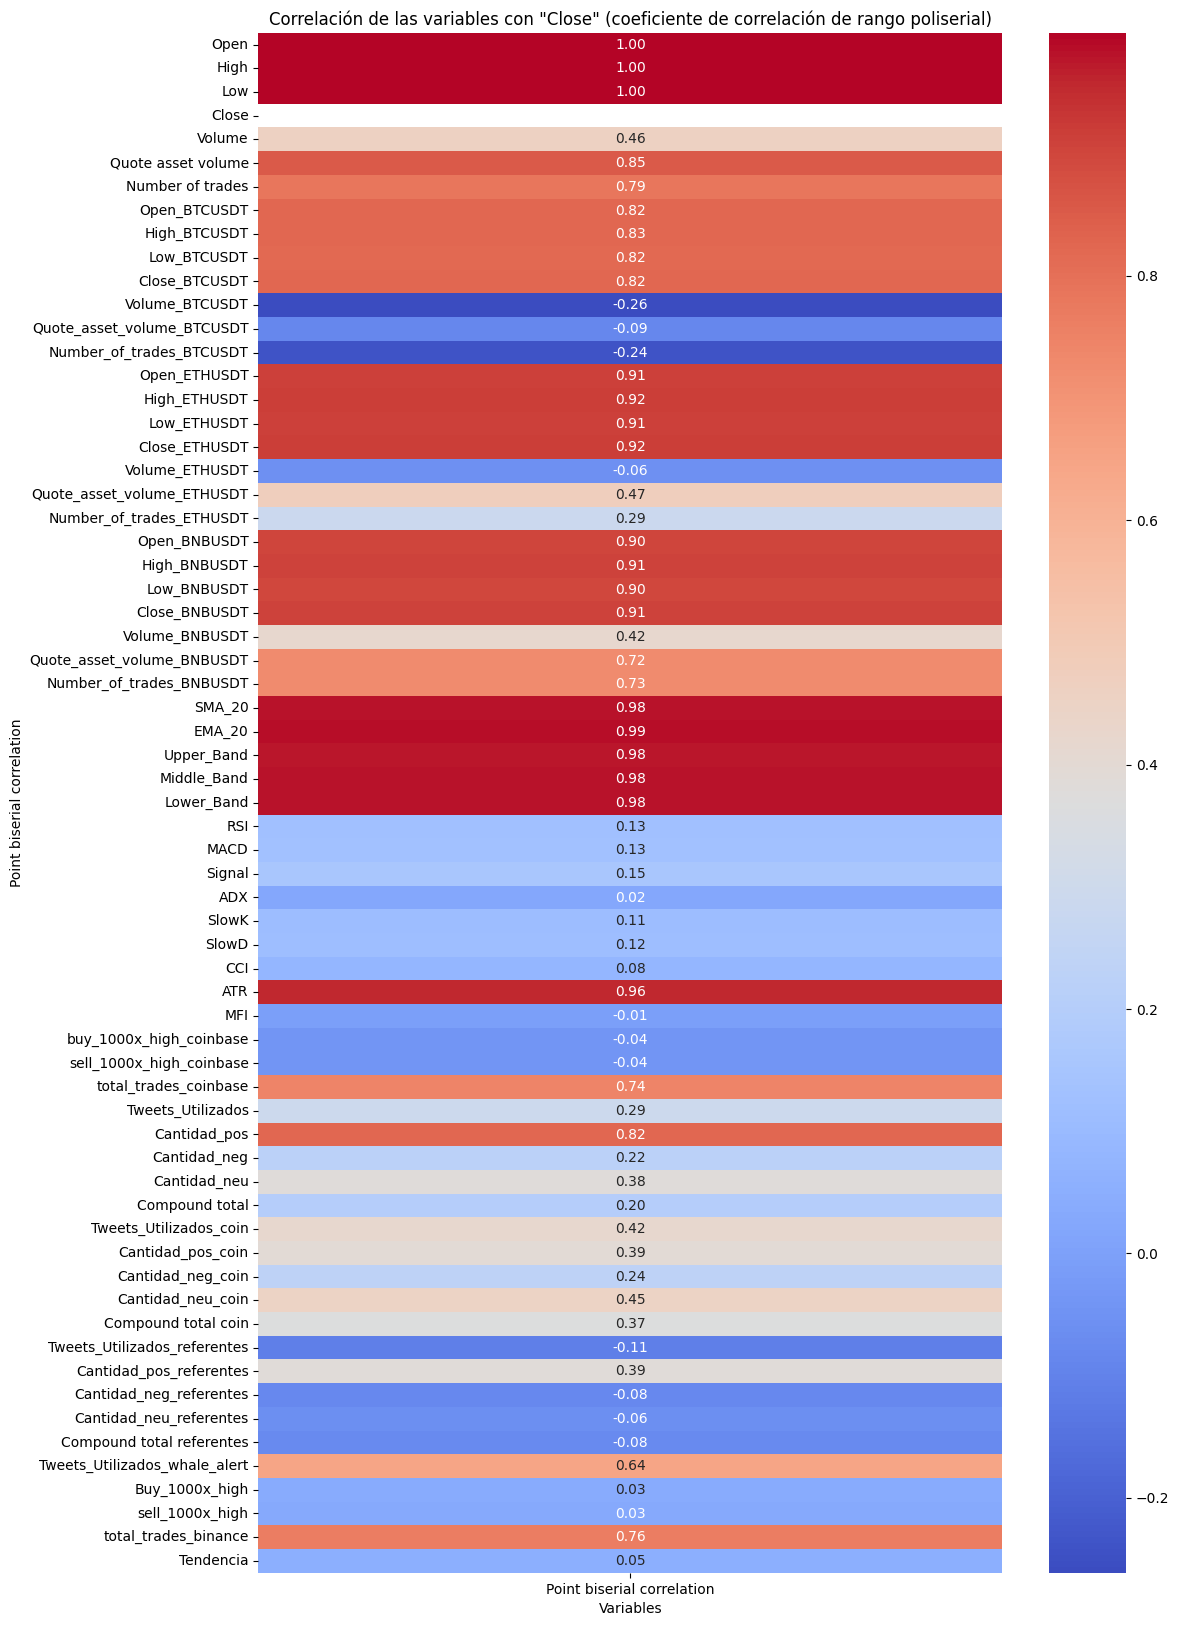

In [95]:
data = dataset.drop('Open_time', axis=1)
data = data.drop('Sentimiento', axis=1)
data = data.drop('Sentimiento_coin', axis=1)
data = data.drop('Sentimiento_referentes', axis=1)

correlation_matrix = pd.DataFrame(index=data.columns, columns=['Point biserial correlation'])
for column in data.columns:
    if column != 'Close':
        corr, _ = pointbiserialr(data[column], data['Close'])
        correlation_matrix.loc[column] = corr

# Convertir los valores de la matriz a numéricos
correlation_matrix['Point biserial correlation'] = pd.to_numeric(correlation_matrix['Point biserial correlation'])

# Crear el heatmap
plt.figure(figsize=(12, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación de las variables con "Close" (coeficiente de correlación de rango poliserial)')
plt.xlabel('Variables')
plt.ylabel('Point biserial correlation')
plt.show()

En los graficos anteriores de correlacion, podemos observar una correlacion lineal segun Pearson:

- Open (Positivo)
- High (Positivo)
- Low (Positivo)
- Close (Positivo)
- Quote Asset Volume (Positivo)
- Number of trades (Binance) (Positivo)
- Open_BTCUSDT (Positivo)
- High_BTCUSDT (Positivo)
- Low_BTCUSDT (Positivo)
- Close_BTCUSDT (Positivo)
- Volume_BTCUSDT (Negativo) <- no muy correlacionado, pero puede expliccar en cierto punto algo de variabilidad
- Number_of_trades_BTCUSDT (Negativo) <- no muy correlacionado, pero puede expliccar en cierto punto algo de variabilidad
- Open_ETHSDT (Positivo) <- Parece esar mas correlacionado con ETH que con BTC
- High_ETHUSDT (Positivo) <- Parece esar mas correlacionado con ETH que con BTC
- Low_ETHUSDT (Positivo) <- Parece esar mas correlacionado con ETH que con BTC
- Close_ETHUSDT (Positivo) <- Parece esar mas correlacionado con ETH que con BTC
- Quote_asset_volume_ETHUSDT <- Parece esar mas correlacionado con ETH que con BTC
- Open_BNBSDT (Positivo) <- Parece esar mas correlacionado con BNB que con BTC y ETH
- High_BNBUSDT (Positivo) <- Parece esar mas correlacionado con BNB que con BTC y ETH
- Low_BNBUSDT (Positivo) <- Parece esar mas correlacionado con BNB que con BTC y ETH
- Close_BNBUSDT (Positivo) <- Parece esar mas correlacionado con BNB que con BTC y ETH
- Volume_BNBUSDT (Positivo)
- Quote_asset_volume_BNBUSDT <- Parece esar mas correlacionado con BNB que con BTC y ETH
- Number_of_trades_BNBUSDT (Postivo)
- SMA_20 (Positivo)
- EMA_20 (Positivo)
- Upper_Band (Positivo)
- Middle_Band (Positivo)
- Lower_Band (Positivo)
- Total trades Coinbase (Positivo)
- Tweets_utilizados_whale_alerts
- ATR (Postivio)
- total_trades_binance


Correlacion NO leneal, segun los coeficientes de Spearman o Kendall:
- Volume (Positivo)
- RSI (Positivo) <- no muy correlacionado, pero puede expliccar en cierto punto algo de variabilidad
- MACD (Negativo) <- no muy correlacionado, pero puede expliccar en cierto punto algo de variabilidad
- Signal <- no muy correlacionado, pero puede expliccar en cierto punto algo de variabilidad
- SlowK (Negativo) <- no muy correlacionado, pero puede expliccar en cierto punto algo de variabilidad
- SlowD (Negativo) <- no muy correlacionado, pero puede expliccar en cierto punto algo de variabilidad
- Number_of_trades_ETHUSDT (Positivo)
- Buy_1000x_high (positivo)
- Sell_1000x_high (positivo)
- Tweets_utilizados (positivo)
- Cantidad_pos (positivo) <- Hay un typo aca
- Cantidad_neg (positivo)
- Cantidad_neu (positivo)
- Compound_total (positivo)
- Tweets_utilizados_coin (positivo)
- Cantidad_pos_coin (postivo)
- Cantidad_neg_coin (postivo)
- Cantidad_neu_coin (postivo)
- Compound_total_coin (positivo)
- Buy_1000x_high_coinbase (positivo) <- no muy correlacionado, pero puede expliccar en cierto punto algo de variabilidad
- Sell_1000x_high_coinbase (positivo) <- no muy correlacionado, pero puede expliccar en cierto punto algo de variabilidad
- total_trades_coinbase

### Box Plot

Considero que los graficos de Box Plot pierden sentido en este tipo de problemas, debido a la alta volatibilidad de los datos, el resultdo es que las cajas estaran siempre comprimdas al final del grafico y se presentara una gran cantidad de outliers. Dejo la visualizacion de estos graficos para justificar:

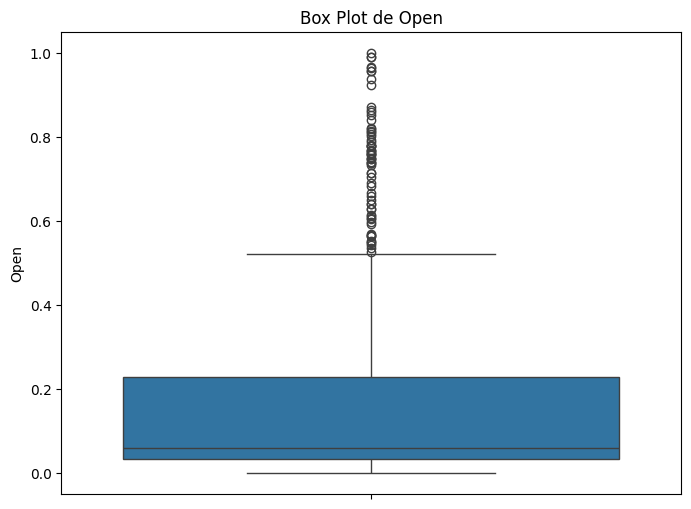

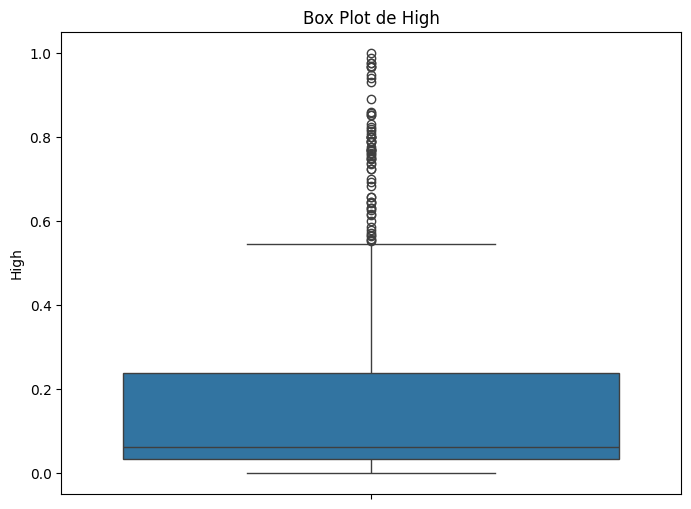

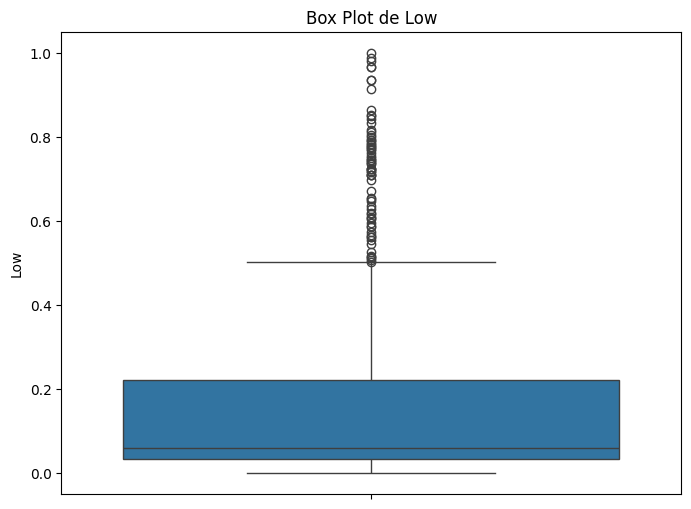

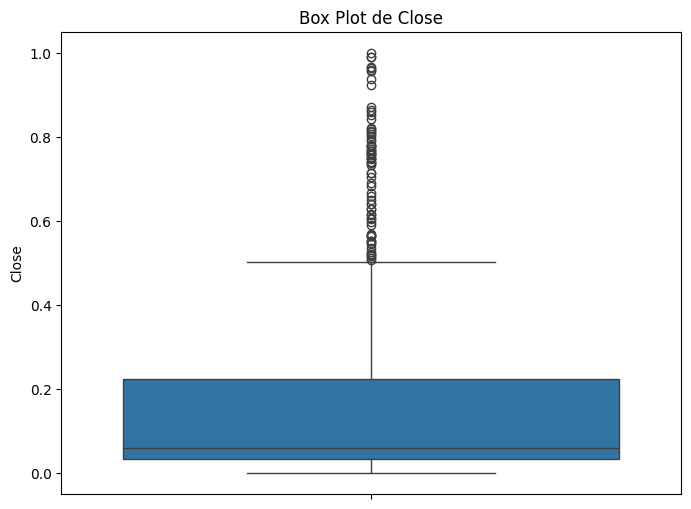

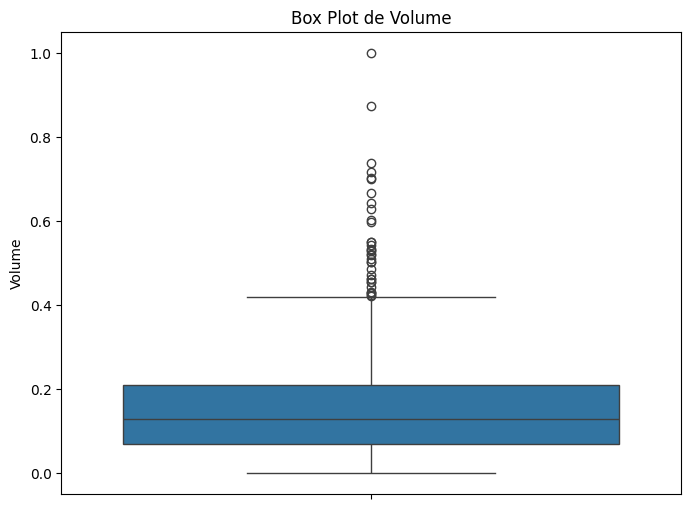

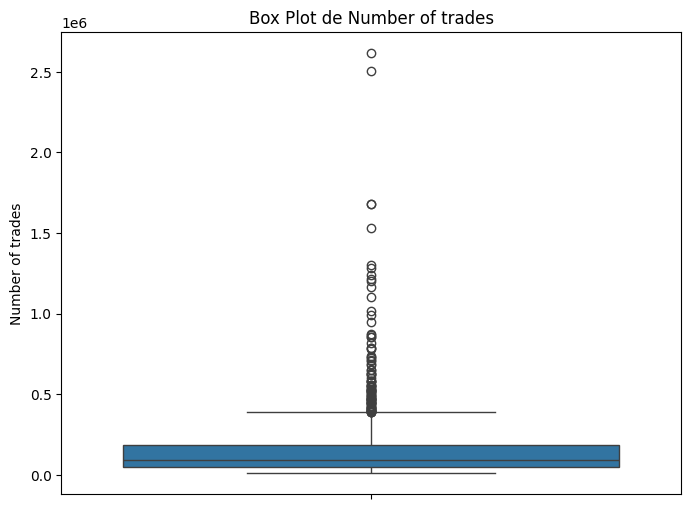

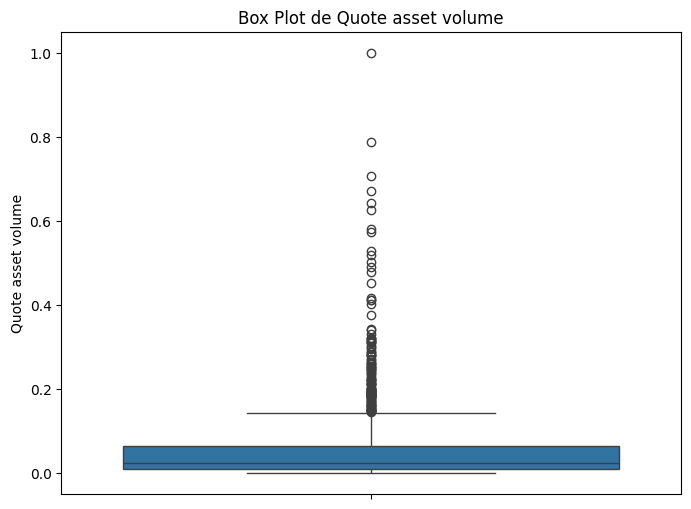

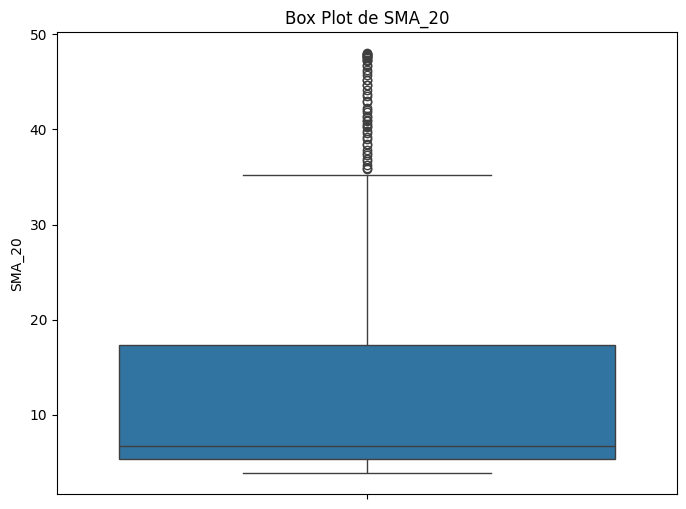

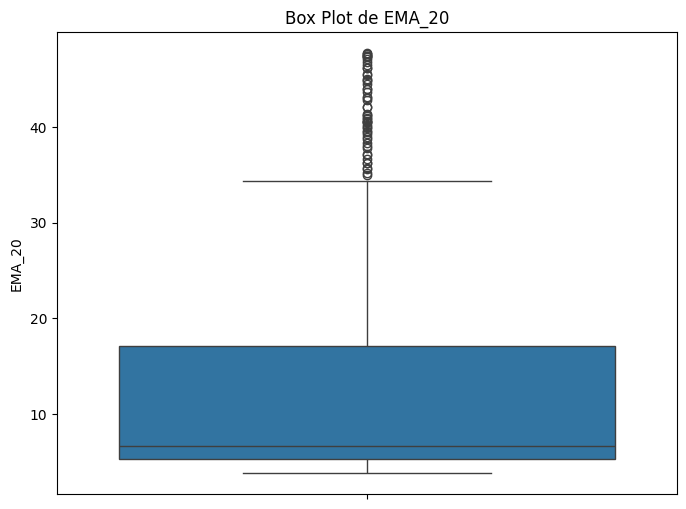

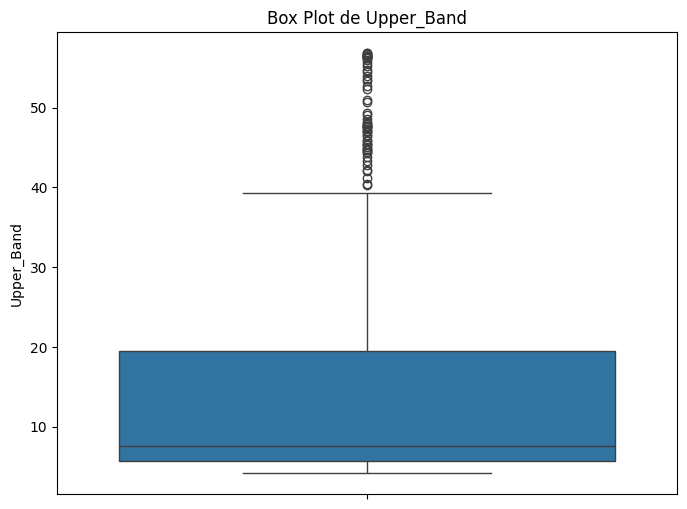

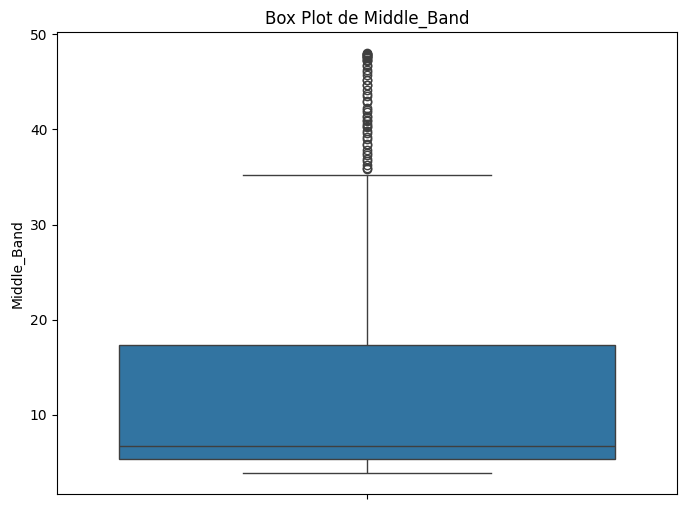

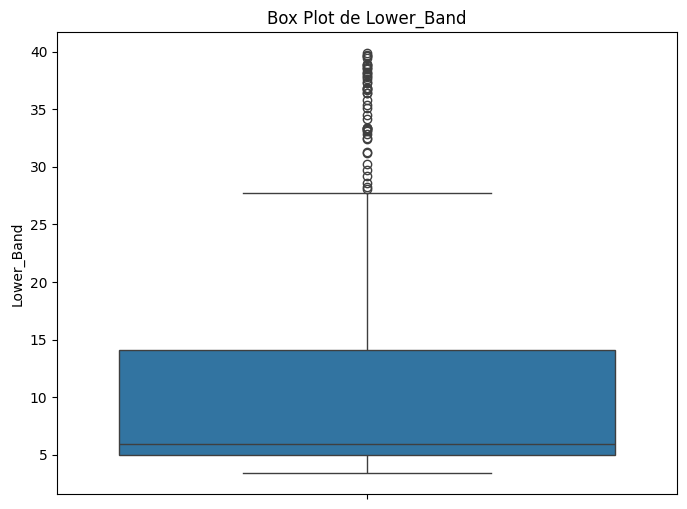

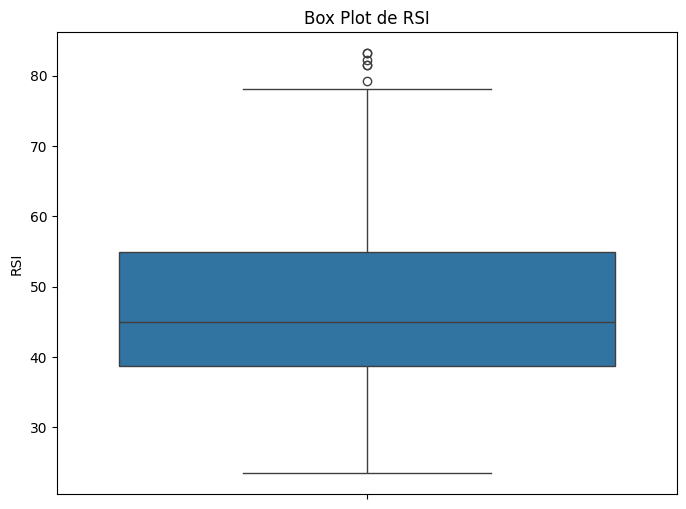

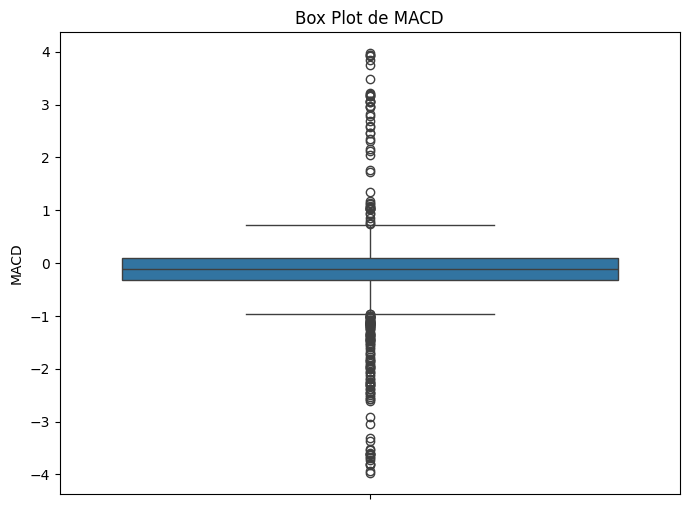

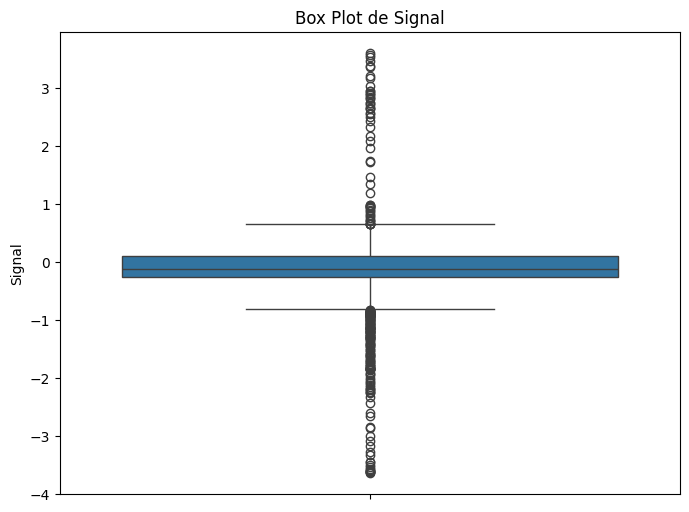

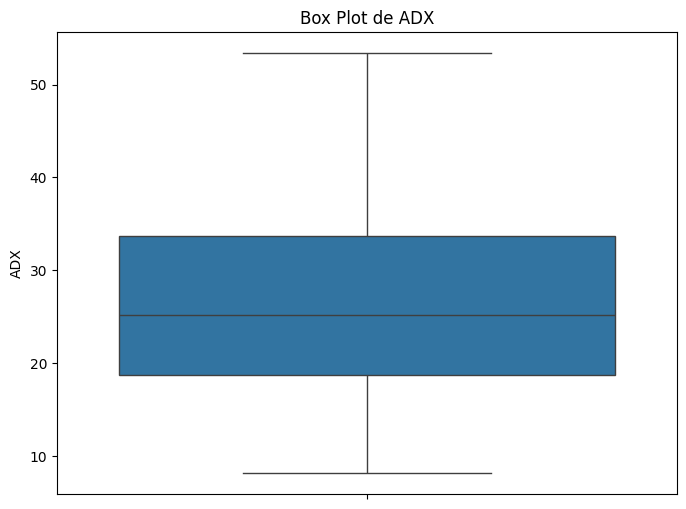

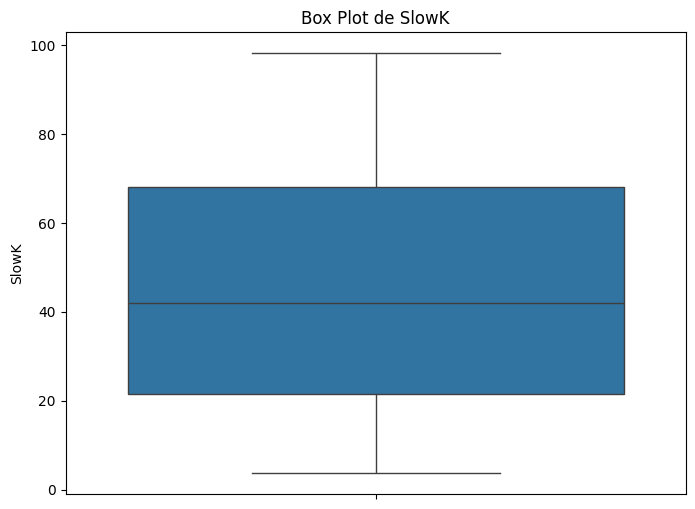

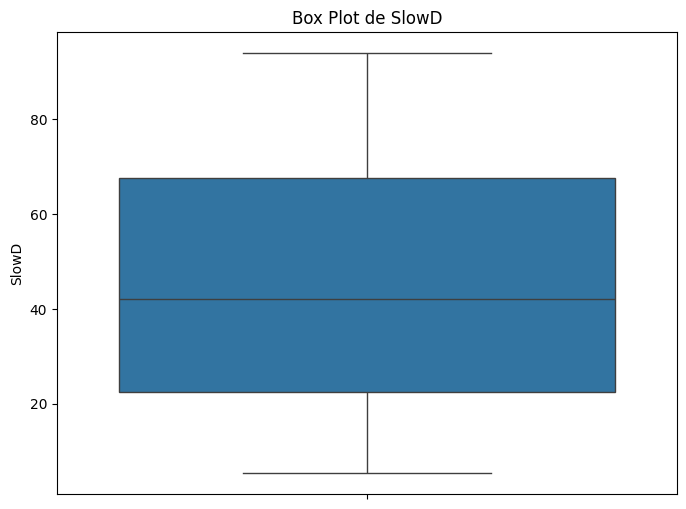

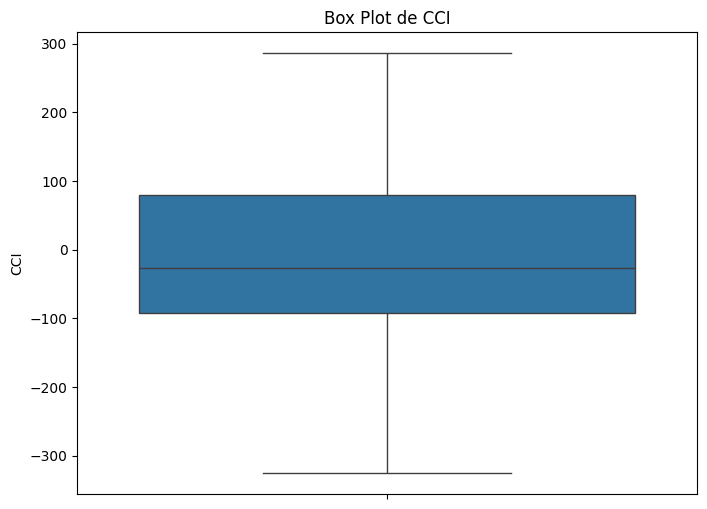

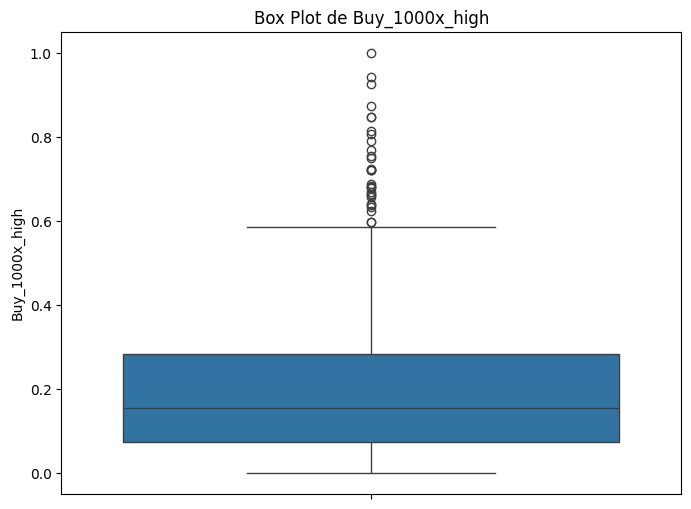

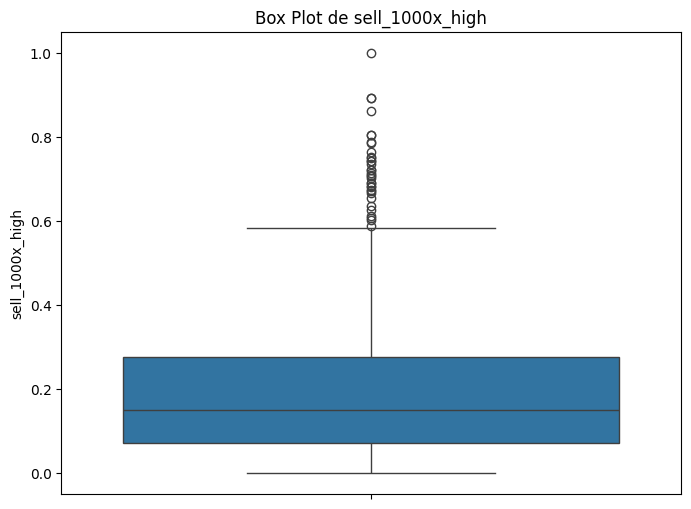

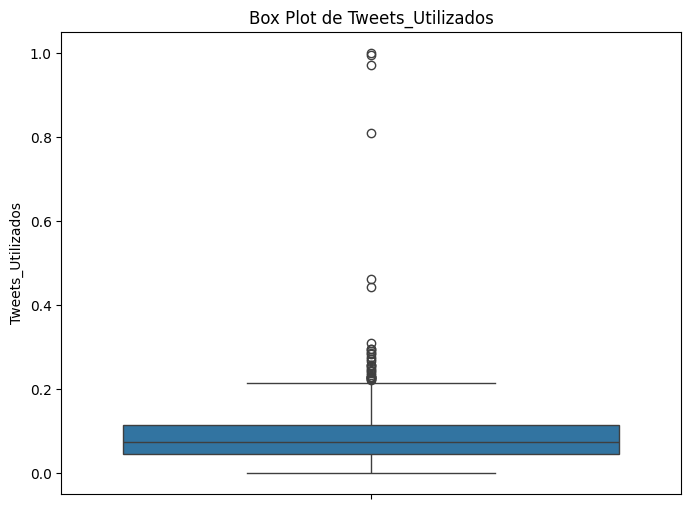

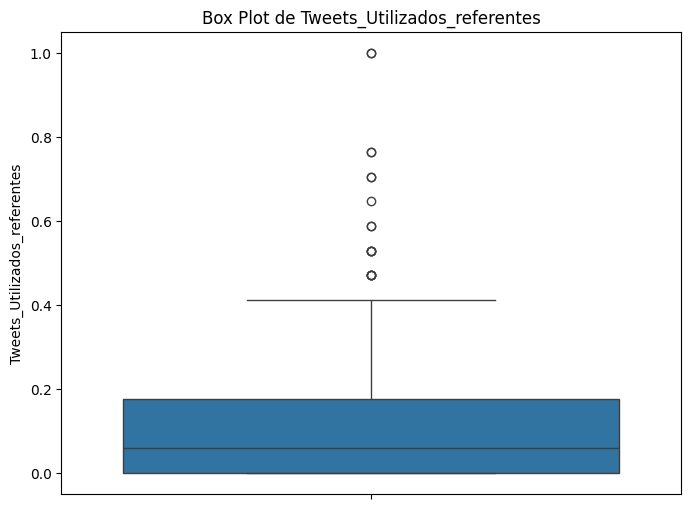

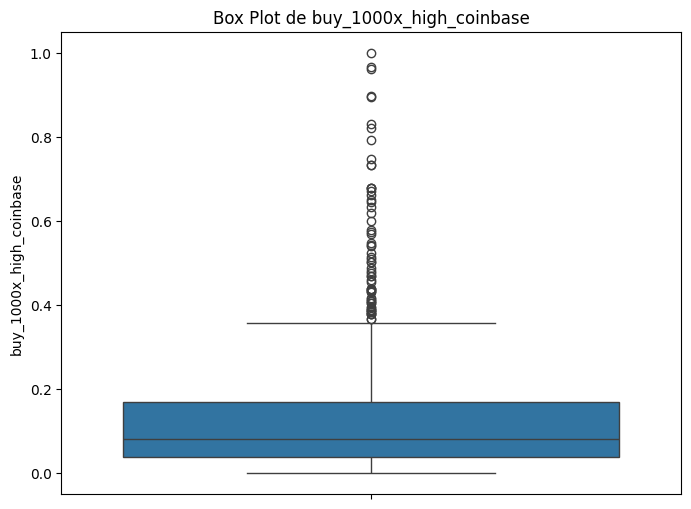

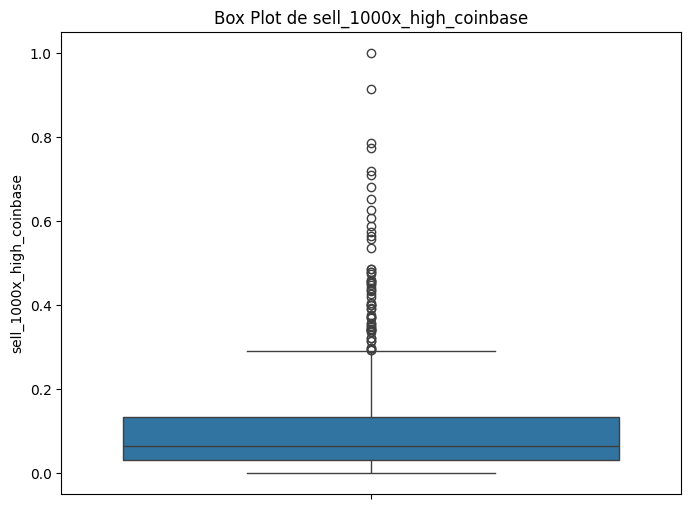

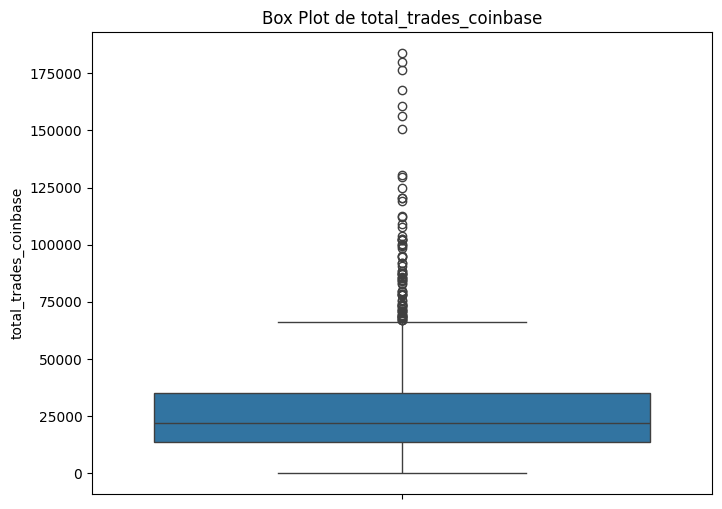

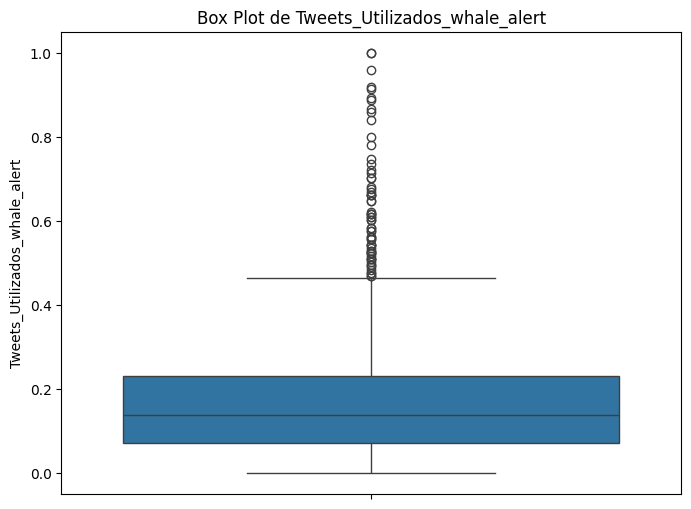

In [96]:
# Seleccionar las variables para los box plots
variables = ['Open', 'High', 'Low', 'Close', 'Volume', 'Number of trades', 'Quote asset volume', 
             'SMA_20', 'EMA_20', 'Upper_Band', 'Middle_Band', 'Lower_Band', 'RSI', 'MACD', 
             'Signal', 'ADX', 'SlowK', 'SlowD', 'CCI', 'Buy_1000x_high', 'sell_1000x_high', 
             'Tweets_Utilizados', 'Tweets_Utilizados_referentes', 'buy_1000x_high_coinbase', 
             'sell_1000x_high_coinbase', 'total_trades_coinbase', 'Tweets_Utilizados_whale_alert']

# Crear un gráfico de box plot para cada variable
for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=dataset[variable], orient="v")
    plt.title(f"Box Plot de {variable}")
    plt.ylabel(variable)
    plt.show()